# Import Data & Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# data path
course_info_path = '/content/drive/My Drive/MOOCs Visualization/datasets/course_info.csv'
course_poster_path = '/content/drive/My Drive/MOOCs Visualization/datasets/course_poster.csv'
course_video_path = '/content/drive/My Drive/MOOCs Visualization/datasets/course_video.csv'
user_log_path = '/content/drive/My Drive/MOOCs Visualization/datasets/user_activity_log.csv'
user_info_path = '/content/drive/My Drive/MOOCs Visualization/datasets/user_info.csv'
user_quiz_path = '/content/drive/My Drive/MOOCs Visualization/datasets/user_test_score.csv'
watch_log_path = '/content/drive/My Drive/MOOCs Visualization/datasets/user_watch_log.csv'

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
course_info = pd.read_csv(course_info_path)
course_poster = pd.read_csv(course_poster_path)
course_video = pd.read_csv(course_video_path)
user_log = pd.read_csv(user_log_path)
user_info = pd.read_csv(user_info_path)
user_quiz = pd.read_csv(user_quiz_path)
watch_log = pd.read_csv(watch_log_path)

# View Uploaded Data

In [7]:
print("Course Info")
display(course_info.head(1))
print("\n")
print("Course Poster")
display(course_poster.head(1))
print("\n")
print("Course Video")
display(course_video.head(1))
print("\n")
print("User Log")
display(user_log.head(1))
print("\n")
print("User Info")
display(user_info.head(1))
print("\n")
print("User Quiz")
display(user_quiz.head(1))
print("\n")
print("Watch Log")
display(watch_log.head(1))

Course Info


,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type,status
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,TRC.2016,2016,1,NaN,0,0,0,0,45,invited_selfreg,selfpace,1




Course Poster


,cv_cid,course_pretitle,course_title,course_description
0,USIS5STDNOBQGGHXDDG7,TRC.2016 (2016/1),การควบคุมยาสูบ รุ่นที่ 4,NaN




Course Video


,v_id,cv_cid,video_source_id
0,ZIDHTXVVXSQZX0ZH49CN,USIS5STDNOBQGGHXDDG7,VB79884A9OC2KYK6H3WB




User Log


,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
0,1,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413688




User Info


,cv_uid,education,occupation,gender,yearofbirth,residence
0,KH8UA5P183ESRY8BQSNP,Above Bachelor Degree,Govenment/State Enterprise Employee,Male,1976.0,Bangkok




User Quiz


,user_test_score_id,cv_uid,test_nid,sub_id,point,total
0,1,GEW2S6U24ZMJTSJLEPTK,EVYPCWEHD3NO60SVF2DD,ZW146UB6QZPD643Y4FJ3,2,2




Watch Log


,cv_uid,video_source_id,cliptime,timestamp,state
0,KH8UA5P183ESRY8BQSNP,BZV2DEBTCWJQZ9XJSTUM,0.58,1479429903,1


# Compare Courses

In [8]:
# create course comparison dataframe
course_compare = course_info[['cv_cid', 'course_title', 'reg_workflow', 'course_type', 'roster_limit']]
course_compare = course_compare.drop_duplicates()

In [9]:
course_compare.head()

,cv_cid,course_title,reg_workflow,course_type,roster_limit
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,invited_selfreg,selfpace,45
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),invited_selfreg,selfpace,14
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,purchase_to_enroll,weekly,50
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,purchase_to_enroll,selfpace,100
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,free_selfreg,selfpace,2000


In [10]:
# find enrolled number of each course
enrolled = user_log[user_log['action_type'] == 'enrolled'][['cv_uid', 'cv_cid']]
enrolled = enrolled.drop_duplicates()

enrolled_df = pd.DataFrame(enrolled['cv_cid'].value_counts())
enrolled_df.reset_index(inplace=True)
enrolled_df.rename(columns={'index':'cv_cid', 'cv_cid':'enrolled'}, inplace=True)

In [11]:
enrolled_df.head()

,cv_cid,enrolled
0,4FGWS62JAC841KUL6OU5,5000
1,FW6GP1Z0HFS7NKLPRODK,5000
2,H1VF4W3F9NZWLNVU0AHX,4999
3,5A8YT3KKZLNDEKAFUC9G,4999
4,KTDV6J95MMM8T3NYTKJ8,4000


In [12]:
# merge enrolled dataframe to course comparison
course_compare = course_compare.merge(enrolled_df, how='outer', on='cv_cid')

In [13]:
course_compare.head()

,cv_cid,course_title,reg_workflow,course_type,roster_limit,enrolled
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,invited_selfreg,selfpace,45,NaN
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),invited_selfreg,selfpace,14,NaN
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,purchase_to_enroll,weekly,50,NaN
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,purchase_to_enroll,selfpace,100,NaN
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,free_selfreg,selfpace,2000,NaN


In [14]:
# find completed number of each course
completed = user_log[user_log['action_type'].isin(['completed_intime', 'completed_late'])][['cv_uid', 'cv_cid']]
completed = completed.drop_duplicates()

completed_df = pd.DataFrame(completed['cv_cid'].value_counts())
completed_df.reset_index(inplace=True)
completed_df.rename(columns={'index':'cv_cid', 'cv_cid':'completed'}, inplace=True)

In [15]:
completed_df.head()

,cv_cid,completed
0,KTDV6J95MMM8T3NYTKJ8,1326
1,4FGWS62JAC841KUL6OU5,963
2,AJMXHLS4EAHHIEIBRUD2,955
3,1RJTD3WGX1GRFVMKS8L8,947
4,58PVKVFVINRFOK7CNA53,934


In [16]:
# merge completed dataframe to course comparison
course_compare = course_compare.merge(completed_df, how='outer', on='cv_cid')

In [17]:
course_compare.head()

,cv_cid,course_title,reg_workflow,course_type,roster_limit,enrolled,completed
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,invited_selfreg,selfpace,45,NaN,NaN
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),invited_selfreg,selfpace,14,NaN,NaN
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,purchase_to_enroll,weekly,50,NaN,NaN
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,purchase_to_enroll,selfpace,100,NaN,NaN
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,free_selfreg,selfpace,2000,NaN,NaN


In [18]:
# find quiz submitted number of each course
submitted = user_log[user_log['action_type'] == 'quiz_submitted'][['cv_uid', 'cv_cid', 'assoc_id', 'assoc_id2']]
submitted = submitted.drop_duplicates()

submitted_df = pd.DataFrame(submitted['cv_cid'].value_counts())
submitted_df.reset_index(inplace=True)
submitted_df.rename(columns={'index':'cv_cid', 'cv_cid':'submitted'}, inplace=True)

In [19]:
submitted_df.head()

,cv_cid,submitted
0,FC6VM7RQT38Z0ZI9M6W9,23535
1,QHFKPN7D6QDV9226ZDHW,16293
2,OTS26V4DL3U4LE4YHWAF,13896
3,SNF5FFS045YAV05CVAUR,13719
4,WJRPZZZ2IEYBGO5YLJ4U,12739


In [20]:
# merge submitted dataframe to course comparison
course_compare = course_compare.merge(submitted_df, how='outer', on='cv_cid')

In [21]:
course_compare.head()

,cv_cid,course_title,reg_workflow,course_type,roster_limit,enrolled,completed,submitted
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,invited_selfreg,selfpace,45,NaN,NaN,1.0
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),invited_selfreg,selfpace,14,NaN,NaN,NaN
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,purchase_to_enroll,weekly,50,NaN,NaN,3.0
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,purchase_to_enroll,selfpace,100,NaN,NaN,NaN
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,free_selfreg,selfpace,2000,NaN,NaN,84.0


In [22]:
# find video number of each course
video = course_video[['cv_cid', 'video_source_id']]
video = video.drop_duplicates()

video_df = pd.DataFrame(video['cv_cid'].value_counts())
video_df.reset_index(inplace=True)
video_df.rename(columns={'index':'cv_cid', 'cv_cid':'video'}, inplace=True)

In [23]:
video_df.head()

,cv_cid,video
0,05D56Q0SK46GK59IAFJZ,47
1,LRQ3O125BDTDCHUI6CL3,46
2,IUVK8F29KDGDF29B1FY3,46
3,GO9R3FH2T2WXZO77V2LB,46
4,1E4ZGDM7EPGXFLDK98QY,45


In [24]:
# merge video dataframe to course comparison
course_compare = course_compare.merge(video_df, how='outer', on='cv_cid')

In [25]:
course_compare.head()

,cv_cid,course_title,reg_workflow,course_type,roster_limit,enrolled,completed,submitted,video
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,invited_selfreg,selfpace,45.0,NaN,NaN,1.0,25.0
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),invited_selfreg,selfpace,14.0,NaN,NaN,NaN,15.0
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,purchase_to_enroll,weekly,50.0,NaN,NaN,3.0,35.0
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,purchase_to_enroll,selfpace,100.0,NaN,NaN,NaN,26.0
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,free_selfreg,selfpace,2000.0,NaN,NaN,84.0,26.0


In [26]:
# view course comparison info
course_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cv_cid        182 non-null    object 
 1   course_title  175 non-null    object 
 2   reg_workflow  175 non-null    object 
 3   course_type   175 non-null    object 
 4   roster_limit  175 non-null    float64
 5   enrolled      105 non-null    float64
 6   completed     85 non-null     float64
 7   submitted     126 non-null    float64
 8   video         166 non-null    float64
dtypes: float64(5), object(4)
memory usage: 14.2+ KB


In [27]:
# drop rows that value is NaN
course_compare.dropna(inplace=True)

In [28]:
# view course comparison info again after drop NaN value
course_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 17 to 150
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cv_cid        73 non-null     object 
 1   course_title  73 non-null     object 
 2   reg_workflow  73 non-null     object 
 3   course_type   73 non-null     object 
 4   roster_limit  73 non-null     float64
 5   enrolled      73 non-null     float64
 6   completed     73 non-null     float64
 7   submitted     73 non-null     float64
 8   video         73 non-null     float64
dtypes: float64(5), object(4)
memory usage: 5.7+ KB


In [29]:
# sort course comparison by completed column in descending order
course_compare_sorted = course_compare.sort_values('completed', ascending=False)

In [30]:
course_compare_sorted.head()

,cv_cid,course_title,reg_workflow,course_type,roster_limit,enrolled,completed,submitted,video
136,KTDV6J95MMM8T3NYTKJ8,Critical Thinking for Business รุ่นที่ 3,free_selfreg,selfpace,4000.0,4000.0,1326.0,12635.0,15.0
71,4FGWS62JAC841KUL6OU5,มหากาพย์ อังกฤษ อัพเกรด : โค้งสุดท้ายไวยากรณ์ ...,free_selfreg,selfpace,5000.0,5000.0,963.0,3811.0,10.0
82,AJMXHLS4EAHHIEIBRUD2,การตลาดในศตวรรษที่ 21 รุ่นที่ 3,free_selfreg,selfpace,4000.0,4000.0,955.0,8882.0,14.0
63,1RJTD3WGX1GRFVMKS8L8,มหากาพย์ อังกฤษ อัพเกรด: ตั้งไข่ไวยากรณ์,free_selfreg,selfpace,4000.0,4000.0,947.0,3930.0,9.0
100,58PVKVFVINRFOK7CNA53,"Unicorn journey: Startup Your Own Business, Mo...",purchase_to_enroll,selfpace,2200.0,994.0,934.0,964.0,3.0


In [31]:
# show courses that reg_workflow is free selfreg
# show courses that course_type is selfpace
course_compare_sorted[(course_compare_sorted['reg_workflow'] == 'free_selfreg') &
                      (course_compare_sorted['course_type'] == 'selfpace')].head(10)

,cv_cid,course_title,reg_workflow,course_type,roster_limit,enrolled,completed,submitted,video
136,KTDV6J95MMM8T3NYTKJ8,Critical Thinking for Business รุ่นที่ 3,free_selfreg,selfpace,4000.0,4000.0,1326.0,12635.0,15.0
71,4FGWS62JAC841KUL6OU5,มหากาพย์ อังกฤษ อัพเกรด : โค้งสุดท้ายไวยากรณ์ ...,free_selfreg,selfpace,5000.0,5000.0,963.0,3811.0,10.0
82,AJMXHLS4EAHHIEIBRUD2,การตลาดในศตวรรษที่ 21 รุ่นที่ 3,free_selfreg,selfpace,4000.0,4000.0,955.0,8882.0,14.0
63,1RJTD3WGX1GRFVMKS8L8,มหากาพย์ อังกฤษ อัพเกรด: ตั้งไข่ไวยากรณ์,free_selfreg,selfpace,4000.0,4000.0,947.0,3930.0,9.0
127,OTS26V4DL3U4LE4YHWAF,ทำอย่างไรให้สินค้า Go Inter ขายได้ขายดี และดัง...,free_selfreg,selfpace,4000.0,3828.0,884.0,13896.0,11.0
129,9301L5BFKAFLGFS5P0BH,English for Job Hunters,free_selfreg,selfpace,4000.0,3997.0,867.0,3338.0,16.0
73,H1VF4W3F9NZWLNVU0AHX,มหากาพย์ อังกฤษ อัพเกรด: Conversation มั่นใจ,free_selfreg,selfpace,5000.0,4999.0,808.0,3869.0,10.0
72,FW6GP1Z0HFS7NKLPRODK,มหากาพย์ อังกฤษ อัพเกรด : ศัพท์ทะลุ อ่านทะลวง,free_selfreg,selfpace,5000.0,5000.0,787.0,3855.0,14.0
137,FNONNX6ZNA8NP3F1FCTV,มหากาพย์ อังกฤษ อัพเกรด: ตั้งไข่ไวยากรณ์ รุ่นท...,free_selfreg,selfpace,4000.0,4000.0,695.0,3460.0,8.0
64,5A8YT3KKZLNDEKAFUC9G,มหากาพย์ อังกฤษ อัพเกรด: ไวยากรณ์พร้อมรบ,free_selfreg,selfpace,5000.0,4999.0,685.0,3908.0,11.0


# Check Selected Courses

Check that selected courses have enrolled users that enrolled courses which have same videos as selected courses or not.

In [32]:
# selected courses
c1 = 'KTDV6J95MMM8T3NYTKJ8' # Critical Thinking for Business รุ่นที่ 3
c2 = 'OTS26V4DL3U4LE4YHWAF' # ทำอย่างไรให้สินค้า Go Inter ขายได้ขายดี และดัง...

In [33]:
# videos @ course 1
c1_video = course_video[course_video['cv_cid'] == c1]
c1_video_array = c1_video['video_source_id'].unique()

# videos @ course 2
c2_video = course_video[course_video['cv_cid'] == c2]
c2_video_array = c2_video['video_source_id'].unique()

In [34]:
display(c1_video.head())
print("\n")
display(c2_video.head())

,v_id,cv_cid,video_source_id
2049,SM8RBAPIZ0D18ZVL6F6Z,KTDV6J95MMM8T3NYTKJ8,X45GUK10ISXE8PQPT33Q
2050,ACT4343RAQBLH71VHNAO,KTDV6J95MMM8T3NYTKJ8,22QQ8REDRNY0GIBK780I
2051,CX3DF7TNMPTSESJMX6QU,KTDV6J95MMM8T3NYTKJ8,M80C0QBHIMI8HZNOL2YU
2052,X7OK5RZ81CDEBOQJMJ25,KTDV6J95MMM8T3NYTKJ8,OMQY8CN76XAIWF2XWOC8
2053,KXAHTZ7I2TSMBLQEY48D,KTDV6J95MMM8T3NYTKJ8,TSSQYRQLKEY8RAFWHTHO


,v_id,cv_cid,video_source_id
1984,EXZGCHQTZ1PYBW8S3C59,OTS26V4DL3U4LE4YHWAF,T6Q8A9B342NEF9ZJ7BIO
1985,0ZD7RJS5H21UZO8BCQFI,OTS26V4DL3U4LE4YHWAF,L7GKVNOCE5HPUQYWJE9D
1986,JB2F29T7QD5LZVP5UQ84,OTS26V4DL3U4LE4YHWAF,H26PSA20BYGQLIOY7114
1987,XGQDH6UNLIOOT9TQCX1E,OTS26V4DL3U4LE4YHWAF,THY3KPF3GESAW9541JUS
1988,ZM8WHK5PFNTD3X50LZ6W,OTS26V4DL3U4LE4YHWAF,FUDZ902HU33PJAK0945S


In [35]:
# same videos @ course 1 & 2
same_video = c1_video[c1_video['video_source_id'].isin(c2_video_array)]['video_source_id'].unique()

In [36]:
print("Total videos @ course 1: " + str(len(c1_video_array)))
print(c1_video_array)

print("\n")

print("Total videos @ course 2: " + str(len(c2_video_array)))
print(c2_video_array)

print("\n")

print("Same videos @ course 1 & 2: " + str(len(same_video)))

Total videos @ course 1: 15
['X45GUK10ISXE8PQPT33Q' '22QQ8REDRNY0GIBK780I' 'M80C0QBHIMI8HZNOL2YU'
 'OMQY8CN76XAIWF2XWOC8' 'TSSQYRQLKEY8RAFWHTHO' '0M5Z309G9YI2BELUBNLL'
 'CG4GJXAC96NBYEDDLPO7' 'ZNJWNCV86I70W5AI5NSY' 'EKXGW57W6WKSR2C51OXB'
 'M8N4OQ4XCA1R30I2ME2N' 'MKBG4VRRT3UKNKH8SVAB' 'FG934YQAMFWK6IVMHG8T'
 'X33IDN7BULXO60A1TPJJ' 'NR487QF1859CUSLGB9AX' 'NECTJKSOSXTXLW4RWSGM']


Total videos @ course 2: 11
['T6Q8A9B342NEF9ZJ7BIO' 'L7GKVNOCE5HPUQYWJE9D' 'H26PSA20BYGQLIOY7114'
 'THY3KPF3GESAW9541JUS' 'FUDZ902HU33PJAK0945S' '8SFIHFBQYX6T2NDVA5KU'
 '8ZB56TQZ5EG6MWJRR9IM' 'TWMCN5LP6IDKZB53XHLT' 'RQU5D4YH5PNEXV69PKHF'
 '6XNGK2T4DU8BUIAXWDBY' 'X7FLQ6LCLJLBTXKHVEV4']


Same videos @ course 1 & 2: 0


In [37]:
# user log @ course 1
c1_user_log = user_log[user_log['cv_cid'] == c1]

# user log @ course 2
c2_user_log = user_log[user_log['cv_cid'] == c2]

In [38]:
# users enrolled @ course 1
c1_enrolled = c1_user_log[c1_user_log['action_type'] == 'enrolled']
c1_enrolled_array = c1_enrolled['cv_uid'].unique()

# users enrolled @ course 2
c2_enrolled = c2_user_log[c2_user_log['action_type'] == 'enrolled']
c2_enrolled_array = c2_enrolled['cv_uid'].unique()

In [39]:
display(c1_enrolled.head())
print("\n")
display(c2_enrolled.head())

,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
732968,732969,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546826145
733327,733328,U4T4UXX1GDO4L1MQVJG6,KTDV6J95MMM8T3NYTKJ8,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546832519
737855,737856,SGZ5TU88BQWW1RCNWOT6,KTDV6J95MMM8T3NYTKJ8,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546910017
737879,737880,XZBOWMWVCYEX0N0P71DK,KTDV6J95MMM8T3NYTKJ8,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546911047
737880,737881,77RH4HM8JBMLHYWA0OEY,KTDV6J95MMM8T3NYTKJ8,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546911058


,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
576062,576063,ATX0WILQ2Q5G5Y70RJF6,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576600
576064,576065,HMWL4WPWYVS097LWWGQO,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576664
576065,576066,7SAZE8WU14LFLQT8Y4PO,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576665
576068,576069,BSYB1PSH1TXD946F2CK9,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576763
576083,576084,QXL4HK9GKM1GQL6XU967,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544577553


In [40]:
# same users enrolled @ course 1 & 2
same_user_enrolled = c1_enrolled[c1_enrolled['cv_uid'].isin(c2_enrolled_array)]['cv_uid'].unique()

In [41]:
print("Total users enrolled @ course 1: " + str(len(c1_enrolled_array)))
print("Total users enrolled @ course 2: " + str(len(c2_enrolled_array)))
print("Same users enrolled @ course 1 & 2: " + str(len(same_user_enrolled)))

Total users enrolled @ course 1: 4000
Total users enrolled @ course 2: 3828
Same users enrolled @ course 1 & 2: 1379


In [42]:
# courses with same videos @ course 1
c1_same_video = course_video[(course_video['video_source_id'].isin(c1_video_array)) & (course_video['cv_cid'] != c1)]
c1_same_video_array = c1_same_video['cv_cid'].unique()

# courses with same videos @ course 2
c2_same_video = course_video[(course_video['video_source_id'].isin(c2_video_array)) & (course_video['cv_cid'] != c2)]
c2_same_video_array = c2_same_video['cv_cid'].unique()

In [43]:
print("Number of courses with same videos @ course 1: " + str(len(c1_same_video_array)))
print(c1_same_video_array)

print("\n")

print("Number of courses with same videos @ course 2: " + str(len(c2_same_video_array)))
print(c2_same_video_array)

Number of courses with same videos @ course 1: 5
['E03Q8Y0SELQE6KZQST0A' 'SWAAXVH11ALLQN7G45UY' 'PQ9L9SJHUPV15IN48NMP'
 'DM7ISMNLA9OCD01MNZLU' 'FSZ5OXDS092PG0HGS584']


Number of courses with same videos @ course 2: 6
['0XZI7HDLAWRDD50A3S5Q' 'Q56DOQ8I5QEOOR28I3F0' 'BI9YROMYAXVJ274847NJ'
 'FA6JAZ3XZFBY9NFCBFHD' 'R0TFDH0YSS8Z1TH0LTGU' '3VVLFFEXB4QFLHEYISFB']


In [44]:
# check info of courses with same videos @ course 1
display(course_info[course_info['cv_cid'].isin(c1_same_video_array)])

print("\n")

# check info of courses with same videos @ course 2
display(course_info[course_info['cv_cid'].isin(c2_same_video_array)])

,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type,status
10,E03Q8Y0SELQE6KZQST0A,Critical Thinking for Business,CU.MOOC.0007,2017,1,ผศ. ดร.เดชา เดชะวัฒนไพศาล,1507514400,1512061199,1507514400,1508777999,2000,free_selfreg,selfpace,1
20,SWAAXVH11ALLQN7G45UY,Critical Thinking for Business (AMATA),CU.MOOC.004.AMATA,2017,2,ผศ. ดร.เดชา เดชะวัฒนไพศาล,0,0,0,0,60,purchase_to_enroll,selfpace,1
31,PQ9L9SJHUPV15IN48NMP,Critical Thinking for Business (BIH),CU.MOOC.004.BIH,2017,2,ผศ. ดร.เดชา เดชะวัฒนไพศาล,0,0,0,0,500,purchase_to_enroll,selfpace,1
39,DM7ISMNLA9OCD01MNZLU,Critical Thinking for Business รุ่นที่ 2,CU.MOOC.004.02,2017,2,ผศ. ดร.เดชา เดชะวัฒนไพศาล,1521478800,1527785999,1521478800,1522774799,2000,free_selfreg,selfpace,1
55,FSZ5OXDS092PG0HGS584,Critical Thinking for Business (Central),CENTRAL.004,2017,3,ผศ. ดร.เดชา เดชะวัฒนไพศาล,1531069200,1534093199,1531069200,1534093199,50,purchase_to_enroll,selfpace,1


,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type,status
12,0XZI7HDLAWRDD50A3S5Q,ทำอย่างไรให้สินค้า Go Inter ขายได้ขายดี และดัง...,CU.MOOC.009,2017,1,รศ. ดร.วรวรรณ องค์ครุฑรักษา,1513011600,1517417999,1513011600,1514307599,2000,free_selfreg,selfpace,1
15,Q56DOQ8I5QEOOR28I3F0,International Advertising and Marketing Commun...,2803381,2017,1,รศ. ดร.วรวรรณ องค์ครุฑรักษา,1523379600,1527785999,1523379600,1524675599,1000,purchase_to_enroll,selfpace,1
32,BI9YROMYAXVJ274847NJ,ทำอย่างไรให้สินค้า Go Inter ขายได้ขายดี และดัง...,CU.MOOC.009.BIH,2017,2,รศ. ดร.วรวรรณ องค์ครุฑรักษา,0,0,0,0,500,purchase_to_enroll,selfpace,1
42,FA6JAZ3XZFBY9NFCBFHD,ทำอย่างไรให้สินค้า Go Inter ขายได้ขายดี และดัง...,CU.MOOC.009.02,2017,2,รศ. ดร.วรวรรณ องค์ครุฑรักษา,1525971600,1532969999,1523379600,1527785999,2000,free_selfreg,selfpace,1
67,R0TFDH0YSS8Z1TH0LTGU,ทำอย่างไรให้สินค้า Go Inter ขายได้ขายดี และดัง...,CU.MOOC.009.CommArt,2018,1,รศ. ดร.วรวรรณ องค์ครุฑรักษา,1533056400,1535734799,1533056400,1535734799,10,purchase_to_enroll,selfpace,1
135,3VVLFFEXB4QFLHEYISFB,International Advertising and Marketing Commun...,2803381,2018,2,รศ. ดร.วรวรรณ องค์ครุฑรักษา,1546794000,1575565199,1546794000,1575565199,1000,purchase_to_enroll,selfpace,1


In [45]:
# from above cell, those courses have same course title but difference in season

In [46]:
# simple approach to check that users that enrolled in selected courses had enrolled in other courses with videos @ selected courses
# course 1
c1_same_enrolled = c1_user_log[c1_user_log['cv_cid'].isin(c1_same_video_array)]
c1_same_enrolled_compare = c1_same_enrolled[c1_same_enrolled['cv_uid'].isin(c1_enrolled_array)]
c1_same_enrolled_compare_array = c1_same_enrolled_compare['cv_cid'].values

# course 2
c2_same_enrolled = c2_user_log[c2_user_log['cv_cid'].isin(c2_same_video_array)]
c2_same_enrolled_compare = c2_same_enrolled[c2_same_enrolled['cv_uid'].isin(c2_enrolled_array)]
c2_same_enrolled_compare_array = c2_same_enrolled_compare['cv_cid'].values

In [47]:
print("Number of Users enrolled in courses with same videos @ course 1: " + str(len(c1_same_enrolled_compare_array)))
print(c1_same_enrolled_compare_array)

print("\n")

print("Number of Users enrolled in courses with same videos @ course 2: " + str(len(c2_same_enrolled_compare_array)))
print(c2_same_enrolled_compare_array)

Number of Users enrolled in courses with same videos @ course 1: 0
[]


Number of Users enrolled in courses with same videos @ course 2: 0
[]


# Merge Watch Log with Course Id of Selected Courses

In [48]:
# watch log @ course 1
c1_watch_log = watch_log[watch_log['video_source_id'].isin(c1_video_array)]
c1_watch_log = c1_watch_log[c1_watch_log['cv_uid'].isin(c1_enrolled_array)]

# watch log @ course 2
c2_watch_log = watch_log[watch_log['video_source_id'].isin(c2_video_array)]
c2_watch_log = c2_watch_log[c2_watch_log['cv_uid'].isin(c2_enrolled_array)]

In [49]:
print("Total watch log @ course 1: " + str(c1_watch_log['cv_uid'].count()))
print("Total unique users in watch log @ course 1: " + str(c1_watch_log['cv_uid'].nunique()))
print("Users that enrolled course 1 but did not watch any video: " + str(len(c1_enrolled_array) - c1_watch_log['cv_uid'].nunique()))
print("Total videos @ course 1: " + str(len(c1_video_array)))
print("Total unique videos watched @ course 1: " + str(c1_watch_log['video_source_id'].nunique()))
display(c1_watch_log.head())

print("\n")

print("Total watch log @ course 2: " + str(c2_watch_log['cv_uid'].count()))
print("Total unique users in watch log @ course 2: " + str(c2_watch_log['cv_uid'].nunique()))
print("Users that enrolled course 2 but did not watch any video: " + str(len(c2_enrolled_array) - c2_watch_log['cv_uid'].nunique()))
print("Total videos @ course 2: " + str(len(c2_video_array)))
print("Total unique videos watched @ course 2: " + str(c2_watch_log['video_source_id'].nunique()))
display(c2_watch_log.head())

Total watch log @ course 1: 597890
Total unique users in watch log @ course 1: 2299
Users that enrolled course 1 but did not watch any video: 1701
Total videos @ course 1: 15
Total unique videos watched @ course 1: 15


,cv_uid,video_source_id,cliptime,timestamp,state
2401422,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,1
2401443,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1507515607,1
2401582,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1507515712,1
2411698,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.243,1507520603,1
2411751,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,20.236,1507520620,1




Total watch log @ course 2: 546532
Total unique users in watch log @ course 2: 1742
Users that enrolled course 2 but did not watch any video: 2086
Total videos @ course 2: 11
Total unique videos watched @ course 2: 11


,cv_uid,video_source_id,cliptime,timestamp,state
3952837,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1513045596,1
3952839,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,20.346,1513045617,1
3952843,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,46.986,1513045689,1
3952845,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,66.987,1513045709,1
3952847,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,84.068,1513045730,1


In [50]:
# users completed @ course 1:
c1_completed = c1_user_log[c1_user_log['action_type'].isin(['completed_intime', 'completed_late'])]
c1_completed_intime = c1_user_log[c1_user_log['action_type'] == 'completed_intime']['cv_uid'].unique()
c1_completed_late = c1_user_log[c1_user_log['action_type'] == 'completed_late']['cv_uid'].unique()
c1_completed_array = c1_completed['cv_uid'].unique()

# users completed @ course 2:
c2_completed = c2_user_log[c2_user_log['action_type'].isin(['completed_intime', 'completed_late'])]
c2_completed_intime = c2_user_log[c2_user_log['action_type'] == 'completed_intime']['cv_uid'].unique()
c2_completed_late = c2_user_log[c2_user_log['action_type'] == 'completed_late']['cv_uid'].unique()
c2_completed_array = c2_completed['cv_uid'].unique()

In [51]:
display(c1_completed.head())
print("\n")
display(c2_completed.head())

,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
733935,733936,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546841359
737430,737431,U4T4UXX1GDO4L1MQVJG6,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546880047
738566,738567,1ZHNXNWZDZEO511K16S0,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546912569
741274,741275,3HT5EROBCGDS6RPOLPJD,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546920468
741995,741996,IOX5ZYC5A6GNZT89M167,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546923403


,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
578922,578923,KXV1D5AMBYJW9NI7AITP,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544590723
579518,579519,2EA55FP14U0CQX3PIBK3,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544594681
580506,580507,O6O4CWTDB2LYLR2EGOCL,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544597269
581395,581396,XNV39VJ5CXT7L52R5SO5,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544599262
582693,582694,ZSMRZD8I6UQ0BCOLUZFP,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544602871


In [52]:
# same users completed @ course 1 & 2
same_user_completed = c1_completed[c1_completed['cv_uid'].isin(c2_completed_array)]['cv_uid'].unique()

In [53]:
print("Total users enrolled @ course 1: " + str(len(c1_enrolled_array)))
print("Total users completed @ course 1: " + str(len(c1_completed_array)))
print("Total users completed intime @ course 1: " + str(len(c1_completed_intime)))
print("Total users completed late @ course 1: " + str(len(c1_completed_late)))
print("Total users who did not complete @ course 1: " + str(len(c1_enrolled_array) - len(c1_completed_array)))

print("\n")

print("Total users enrolled @ course 2: " + str(len(c2_enrolled_array)))
print("Total users completed @ course 2: " + str(len(c2_completed_array)))
print("Total users completed intime @ course 2: " + str(len(c2_completed_intime)))
print("Total users completed late @ course 2: " + str(len(c2_completed_late)))
print("Total users who did not complete @ course 2: " + str(len(c2_enrolled_array) - len(c2_completed_array)))

print("\n")

print("Same users completed @ course 1 & 2: " + str(len(same_user_completed)))

Total users enrolled @ course 1: 4000
Total users completed @ course 1: 1326
Total users completed intime @ course 1: 1326
Total users completed late @ course 1: 0
Total users who did not complete @ course 1: 2674


Total users enrolled @ course 2: 3828
Total users completed @ course 2: 884
Total users completed intime @ course 2: 835
Total users completed late @ course 2: 49
Total users who did not complete @ course 2: 2944


Same users completed @ course 1 & 2: 336


In [54]:
# function to apply completed as 1 and not completed as 0
def completed_or_not(row, course_completed_array):
  if row in course_completed_array:
    return 1
  else:
    return 0

In [55]:
# add completed column @ course 1
c1_watch_log['completed'] = c1_watch_log['cv_uid'].apply(lambda x: completed_or_not(x, c1_completed_array))

# add completed column @ course 2
c2_watch_log['completed'] = c2_watch_log['cv_uid'].apply(lambda x: completed_or_not(x, c2_completed_array))

In [56]:
print("Total users completed @ course 1: " + str(len(c1_completed_array)))
print("Total unique users completed in watch log @ course 1: " + str(c1_watch_log[c1_watch_log['completed'] == 1]['cv_uid'].nunique()))
print("Total watch log of users completed @ course 1: " + str(c1_watch_log[c1_watch_log['completed'] == 1]['cv_uid'].count()))
display(c1_watch_log.head())

print("\n")

print("Total users completed @ course 2: " + str(len(c2_completed_array)))
print("Total unique users completed in watch log @ course 2: " + str(c2_watch_log[c2_watch_log['completed'] == 1]['cv_uid'].nunique()))
print("Total watch log of users completed @ course 2: " + str(c2_watch_log[c2_watch_log['completed'] == 1]['cv_uid'].count()))
display(c2_watch_log.head())

Total users completed @ course 1: 1326
Total unique users completed in watch log @ course 1: 1303
Total watch log of users completed @ course 1: 494941


,cv_uid,video_source_id,cliptime,timestamp,state,completed
2401422,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,1,0
2401443,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1507515607,1,0
2401582,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1507515712,1,0
2411698,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.243,1507520603,1,0
2411751,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,20.236,1507520620,1,0




Total users completed @ course 2: 884
Total unique users completed in watch log @ course 2: 884
Total watch log of users completed @ course 2: 446328


,cv_uid,video_source_id,cliptime,timestamp,state,completed
3952837,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1513045596,1,1
3952839,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,20.346,1513045617,1,1
3952843,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,46.986,1513045689,1,1
3952845,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,66.987,1513045709,1,1
3952847,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,84.068,1513045730,1,1


In [57]:
# check users that completed but no watch log @ course 1
c1_completed[~c1_completed['cv_uid'].isin(c1_watch_log[c1_watch_log['completed'] == 1]['cv_uid'].unique())].head()

,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
1037949,1037950,HMWL4WPWYVS097LWWGQO,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1551168418
1038281,1038282,JLGLI1CJ70OYPJX645DH,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1551172118
1039357,1039358,F91WX53MZBN4UPY2O4G9,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1551189310
1039625,1039626,3J8HY0ICT17UW7MEG1A5,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1551191490
1041613,1041614,UFFVALMPGO47H6I8RTG5,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1551231457


In [58]:
# random sample and check for sure that there is no this user watch log
watch_log[(watch_log['cv_uid'] == '3J8HY0ICT17UW7MEG1A5	') & (watch_log['video_source_id'].isin(c1_video_array))]['cv_uid'].count()

0

# Export CSV file

In [ ]:
# convert timestamp to datetime @ course 1
c1_watch_log_dt = c1_watch_log.copy()
c1_watch_log_dt['datetime'] = c1_watch_log_dt['timestamp'].apply(lambda t: pd.to_datetime(t,unit='s')+pd.Timedelta('7H'))
c1_watch_log_dt.drop('timestamp', axis=1, inplace=True)

# convert timestamp to datetime @ course 2
c2_watch_log_dt = c2_watch_log.copy()
c2_watch_log_dt['datetime'] = c2_watch_log_dt['timestamp'].apply(lambda t: pd.to_datetime(t,unit='s')+pd.Timedelta('7H'))
c2_watch_log_dt.drop('timestamp', axis=1, inplace=True)

In [ ]:
display(c1_watch_log_dt.head())
display(c2_watch_log_dt.head())

,cv_uid,video_source_id,cliptime,state,completed,datetime
2401422,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1,0,2017-10-09 09:19:47
2401443,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1,0,2017-10-09 09:20:07
2401582,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1,0,2017-10-09 09:21:52
2411698,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.243,1,0,2017-10-09 10:43:23
2411751,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,20.236,1,0,2017-10-09 10:43:40


,cv_uid,video_source_id,cliptime,state,completed,datetime
3952837,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1,1,2017-12-12 09:26:36
3952839,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,20.346,1,1,2017-12-12 09:26:57
3952843,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,46.986,1,1,2017-12-12 09:28:09
3952845,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,66.987,1,1,2017-12-12 09:28:29
3952847,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,84.068,1,1,2017-12-12 09:28:50


In [60]:
from google.colab import files

In [ ]:
# export CSV @ course 1
c1_watch_log_dt.to_csv('c1_watch_log_dt.csv', index=False)

# export CSV @ course 2
c2_watch_log_dt.to_csv('c2_watch_log_dt.csv', index=False)

In [ ]:
#  test reading csv file
c1_test = pd.read_csv('c1_watch_log_dt.csv')
c2_test = pd.read_csv('c2_watch_log_dt.csv')

In [ ]:
display(c1_test.head())
print("\n")
display(c2_test.head())

,cv_uid,video_source_id,cliptime,state,completed,datetime
0,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1,0,2017-10-09 09:19:47
1,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1,0,2017-10-09 09:20:07
2,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1,0,2017-10-09 09:21:52
3,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.243,1,0,2017-10-09 10:43:23
4,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,20.236,1,0,2017-10-09 10:43:40


,cv_uid,video_source_id,cliptime,state,completed,datetime
0,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1,1,2017-12-12 09:26:36
1,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,20.346,1,1,2017-12-12 09:26:57
2,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,46.986,1,1,2017-12-12 09:28:09
3,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,66.987,1,1,2017-12-12 09:28:29
4,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,84.068,1,1,2017-12-12 09:28:50


In [ ]:
# download course 1 watch log
files.download('c1_watch_log_dt.csv')

In [ ]:
# download course 2 watch log
files.download('c2_watch_log_dt.csv')

# Predict Possible Order of Video by Using Most Frequent Path

In [ ]:
# assign cliptime more than what time to consider as finished that video
# max cliptime - 15
# choose a record that cliptime more than selected time and used that timestamp

In [ ]:
# difference of using mean from top 20 max cliptime and max cliptime is very small for each video
# assume that max cliptime is end of each video
# assume that finished watching video when max cliptime of the user for each video is more than max cliptime of all users - 15

# @ course 1
print("Course 1:")
for video in c1_video_array:
  max_cliptime = c1_watch_log[c1_watch_log['video_source_id'] == video]['cliptime'].max()
  mean_max_cliptime = c1_watch_log[c1_watch_log['video_source_id'] == video]['cliptime'].sort_values(ascending=False).head(20).mean()
  print(video + ": " + str(max_cliptime - mean_max_cliptime))

print("\n")

# @ course 2
print("Course 2:")
for video in c2_video_array:
  max_cliptime = c2_watch_log[c2_watch_log['video_source_id'] == video]['cliptime'].max()
  mean_max_cliptime = c2_watch_log[c2_watch_log['video_source_id'] == video]['cliptime'].sort_values(ascending=False).head(20).mean()
  print(video + ": " + str(max_cliptime - mean_max_cliptime))

Course 1:
X45GUK10ISXE8PQPT33Q: 0.02904999999998381
22QQ8REDRNY0GIBK780I: 0.02980000000002292
M80C0QBHIMI8HZNOL2YU: 0.08485000000001719
OMQY8CN76XAIWF2XWOC8: 0.058250000000015234
TSSQYRQLKEY8RAFWHTHO: -1.1368683772161603e-13
0M5Z309G9YI2BELUBNLL: 5.684341886080802e-14
CG4GJXAC96NBYEDDLPO7: 0.11405000000002019
ZNJWNCV86I70W5AI5NSY: 0.07630000000000337
EKXGW57W6WKSR2C51OXB: 0.04279999999999973
M8N4OQ4XCA1R30I2ME2N: 0.10164999999960855
MKBG4VRRT3UKNKH8SVAB: 1.1368683772161603e-13
FG934YQAMFWK6IVMHG8T: 0.11725000000004115
X33IDN7BULXO60A1TPJJ: -1.4210854715202004e-13
NR487QF1859CUSLGB9AX: 0.059199999999975716
NECTJKSOSXTXLW4RWSGM: 0.11474999999992974


Course 2:
T6Q8A9B342NEF9ZJ7BIO: 0.06959999999992306
L7GKVNOCE5HPUQYWJE9D: 0.020049999999855572
H26PSA20BYGQLIOY7114: 0.07029999999997472
THY3KPF3GESAW9541JUS: 0.05185000000005857
FUDZ902HU33PJAK0945S: 1.1368683772161603e-13
8SFIHFBQYX6T2NDVA5KU: 0.10760000000004766
8ZB56TQZ5EG6MWJRR9IM: 0.08255000000013979
TWMCN5LP6IDKZB53XHLT: 1.13686837721

In [ ]:
# finish_watched_time @ course 1
c1_finished_time = {}
for video in c1_video_array:
  max_cliptime = c1_watch_log[c1_watch_log['video_source_id'] == video]['cliptime'].max()
  c1_finished_time[video] = np.floor(max_cliptime - 15)

# finish_watched_time @ course 2
c2_finished_time = {}
for video in c2_video_array:
  max_cliptime = c2_watch_log[c2_watch_log['video_source_id'] == video]['cliptime'].max()
  c2_finished_time[video] = np.floor(max_cliptime - 15)

In [ ]:
print("Course 1:")
print(c1_finished_time)
print("\n")
print("Course 2:")
print(c2_finished_time)

Course 1:
{'X45GUK10ISXE8PQPT33Q': 163.0, '22QQ8REDRNY0GIBK780I': 388.0, 'M80C0QBHIMI8HZNOL2YU': 117.0, 'OMQY8CN76XAIWF2XWOC8': 56.0, 'TSSQYRQLKEY8RAFWHTHO': 365.0, '0M5Z309G9YI2BELUBNLL': 284.0, 'CG4GJXAC96NBYEDDLPO7': 127.0, 'ZNJWNCV86I70W5AI5NSY': 134.0, 'EKXGW57W6WKSR2C51OXB': 139.0, 'M8N4OQ4XCA1R30I2ME2N': 672.0, 'MKBG4VRRT3UKNKH8SVAB': 341.0, 'FG934YQAMFWK6IVMHG8T': 163.0, 'X33IDN7BULXO60A1TPJJ': 213.0, 'NR487QF1859CUSLGB9AX': 401.0, 'NECTJKSOSXTXLW4RWSGM': 227.0}


Course 2:
{'T6Q8A9B342NEF9ZJ7BIO': 348.0, 'L7GKVNOCE5HPUQYWJE9D': 284.0, 'H26PSA20BYGQLIOY7114': 264.0, 'THY3KPF3GESAW9541JUS': 824.0, 'FUDZ902HU33PJAK0945S': 356.0, '8SFIHFBQYX6T2NDVA5KU': 493.0, '8ZB56TQZ5EG6MWJRR9IM': 380.0, 'TWMCN5LP6IDKZB53XHLT': 373.0, 'RQU5D4YH5PNEXV69PKHF': 508.0, '6XNGK2T4DU8BUIAXWDBY': 460.0, 'X7FLQ6LCLJLBTXKHVEV4': 666.0}


In [ ]:
# create finished watch log dataframe @ course 1
c1_finished_watch_log = c1_watch_log.sort_values('cliptime', ascending=False).drop_duplicates(['cv_uid', 'video_source_id'])

# create finished watch log dataframe @ course 2
c2_finished_watch_log = c2_watch_log.sort_values('cliptime', ascending=False).drop_duplicates(['cv_uid', 'video_source_id'])

In [ ]:
display(c1_finished_watch_log.head())
display(c2_finished_watch_log.head())

,cv_uid,video_source_id,cliptime,timestamp,state,completed
35484814,UR1GJ8ZT57TSK7O6A6TL,M8N4OQ4XCA1R30I2ME2N,687.638,1547016517,1,1
38370026,QVO2RD65JZ507O30OCH3,M8N4OQ4XCA1R30I2ME2N,687.531,1548667809,1,1
36404819,328U6UPDCXRHFBXUBKXG,M8N4OQ4XCA1R30I2ME2N,687.531,1547520740,1,1
37563920,ZQAAFHERI1F3IWWZGFYR,M8N4OQ4XCA1R30I2ME2N,687.531,1548153574,1,1
38231375,G3LFCUTAH4RM18FZQKP2,M8N4OQ4XCA1R30I2ME2N,687.531,1548592963,1,1


,cv_uid,video_source_id,cliptime,timestamp,state,completed
36014534,M9AAULONL2MK0H5G3QWZ,THY3KPF3GESAW9541JUS,839.993,1547304787,1,1
12304103,IAFCYJSNKD5FHZ5Y6AGP,THY3KPF3GESAW9541JUS,839.990,1527670359,1,0
37973883,BW57O6UN32BF5KGQ5Q41,THY3KPF3GESAW9541JUS,839.985,1548416840,1,1
34179018,8SSCENG4Y5NA8Q2SVP2N,THY3KPF3GESAW9541JUS,839.984,1546185168,1,1
33444626,PILFQ681L3D2DF5AQBSA,THY3KPF3GESAW9541JUS,839.977,1545742298,1,0


In [ ]:
def select_finish_watched(finished_time, row):
  row['gt_finished_time'] = row['cliptime'] - finished_time[row['video_source_id']]
  return row

In [ ]:
# select only finish watched video watch log of each user @ course 1
c1_finished_watch_log = c1_finished_watch_log.apply(lambda x: select_finish_watched(c1_finished_time, x), axis=1)
c1_finished_watch_log = c1_finished_watch_log[c1_finished_watch_log['gt_finished_time'] >= 0].sort_values('timestamp')
c1_finished_watch_log.drop(['state', 'gt_finished_time'], axis=1, inplace=True)
c1_finished_watch_log.reset_index(drop=True, inplace=True)

# select only finish watched video watch log of each user @ course 2
c2_finished_watch_log = c2_finished_watch_log.apply(lambda x: select_finish_watched(c2_finished_time, x), axis=1)
c2_finished_watch_log = c2_finished_watch_log[c2_finished_watch_log['gt_finished_time'] >= 0].sort_values('timestamp')
c2_finished_watch_log.drop(['state', 'gt_finished_time'], axis=1, inplace=True)
c2_finished_watch_log.reset_index(drop=True, inplace=True)

In [ ]:
display(c1_finished_watch_log.head())
display(c2_finished_watch_log.head())

,cv_uid,video_source_id,cliptime,timestamp,completed
0,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,177.139,1507521069,0
1,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,394.563,1507522780,0
2,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,128.305,1507523537,0
3,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,70.375,1507523832,0
4,ZTMGT2XES5SP5HEP7136,TSSQYRQLKEY8RAFWHTHO,374.973,1507524422,0


,cv_uid,video_source_id,cliptime,timestamp,completed
0,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,350.447,1513049928,0
1,T4UPK6FEF54WXVNPLEFT,T6Q8A9B342NEF9ZJ7BIO,362.349,1513088387,0
2,A2DROF6SOL7X1Z9L5QJR,T6Q8A9B342NEF9ZJ7BIO,360.578,1513100228,0
3,A2DROF6SOL7X1Z9L5QJR,L7GKVNOCE5HPUQYWJE9D,295.385,1513100631,0
4,A2DROF6SOL7X1Z9L5QJR,H26PSA20BYGQLIOY7114,275.349,1513100985,0


In [ ]:
def order_video(row, watch_log):
  cv_uid_df = watch_log[watch_log['cv_uid'] == row['cv_uid']]
  cv_uid_df.reset_index(drop=True, inplace=True)
  number = cv_uid_df[cv_uid_df['video_source_id'] == row['video_source_id']].index.tolist()[0]
  row['order'] = number+101
  return row

In [ ]:
# add order column @ course 1
c1_finished_watch_log = c1_finished_watch_log.apply(lambda x: order_video(x, c1_finished_watch_log), axis=1)

# add order column @ course 2
c2_finished_watch_log = c2_finished_watch_log.apply(lambda x: order_video(x, c2_finished_watch_log), axis=1)

In [ ]:
display(c1_finished_watch_log.head())
display(c2_finished_watch_log.head())

,cv_uid,video_source_id,cliptime,timestamp,completed,order
0,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,177.139,1507521069,0,101
1,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,394.563,1507522780,0,102
2,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,128.305,1507523537,0,103
3,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,70.375,1507523832,0,104
4,ZTMGT2XES5SP5HEP7136,TSSQYRQLKEY8RAFWHTHO,374.973,1507524422,0,105


,cv_uid,video_source_id,cliptime,timestamp,completed,order
0,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,350.447,1513049928,0,101
1,T4UPK6FEF54WXVNPLEFT,T6Q8A9B342NEF9ZJ7BIO,362.349,1513088387,0,101
2,A2DROF6SOL7X1Z9L5QJR,T6Q8A9B342NEF9ZJ7BIO,360.578,1513100228,0,101
3,A2DROF6SOL7X1Z9L5QJR,L7GKVNOCE5HPUQYWJE9D,295.385,1513100631,0,102
4,A2DROF6SOL7X1Z9L5QJR,H26PSA20BYGQLIOY7114,275.349,1513100985,0,103


# Visualize number of users finished watching each video in each course.

In [ ]:
# seperate groups: Completed/Not-Completed
# create a dataframe that show order of videos that user watched
# order by the order of video that finished by user using timestamp

In [ ]:
display(c1_finished_watch_log.head())
display(c2_finished_watch_log.head())

,cv_uid,video_source_id,cliptime,timestamp,completed,order
0,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,177.139,1507521069,0,101
1,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,394.563,1507522780,0,102
2,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,128.305,1507523537,0,103
3,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,70.375,1507523832,0,104
4,ZTMGT2XES5SP5HEP7136,TSSQYRQLKEY8RAFWHTHO,374.973,1507524422,0,105


,cv_uid,video_source_id,cliptime,timestamp,completed,order
0,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,350.447,1513049928,0,101
1,T4UPK6FEF54WXVNPLEFT,T6Q8A9B342NEF9ZJ7BIO,362.349,1513088387,0,101
2,A2DROF6SOL7X1Z9L5QJR,T6Q8A9B342NEF9ZJ7BIO,360.578,1513100228,0,101
3,A2DROF6SOL7X1Z9L5QJR,L7GKVNOCE5HPUQYWJE9D,295.385,1513100631,0,102
4,A2DROF6SOL7X1Z9L5QJR,H26PSA20BYGQLIOY7114,275.349,1513100985,0,103


In [ ]:
# group videos and count finished watch log @ course 1
c1_group_video = c1_finished_watch_log.groupby('video_source_id').agg({'cv_uid':'count'})

# group videos and count finished watch log @ course 2
c2_group_video = c2_finished_watch_log.groupby('video_source_id').agg({'cv_uid':'count'})

In [ ]:
display(c1_group_video)
display(c2_group_video)

,cv_uid
video_source_id,
0M5Z309G9YI2BELUBNLL,1511
22QQ8REDRNY0GIBK780I,1871
CG4GJXAC96NBYEDDLPO7,1468
EKXGW57W6WKSR2C51OXB,1430
FG934YQAMFWK6IVMHG8T,1346
M80C0QBHIMI8HZNOL2YU,1738
M8N4OQ4XCA1R30I2ME2N,1342
MKBG4VRRT3UKNKH8SVAB,1339
NECTJKSOSXTXLW4RWSGM,1251


,cv_uid
video_source_id,
6XNGK2T4DU8BUIAXWDBY,881
8SFIHFBQYX6T2NDVA5KU,915
8ZB56TQZ5EG6MWJRR9IM,954
FUDZ902HU33PJAK0945S,1019
H26PSA20BYGQLIOY7114,1279
L7GKVNOCE5HPUQYWJE9D,1362
RQU5D4YH5PNEXV69PKHF,800
T6Q8A9B342NEF9ZJ7BIO,1539
THY3KPF3GESAW9541JUS,1065


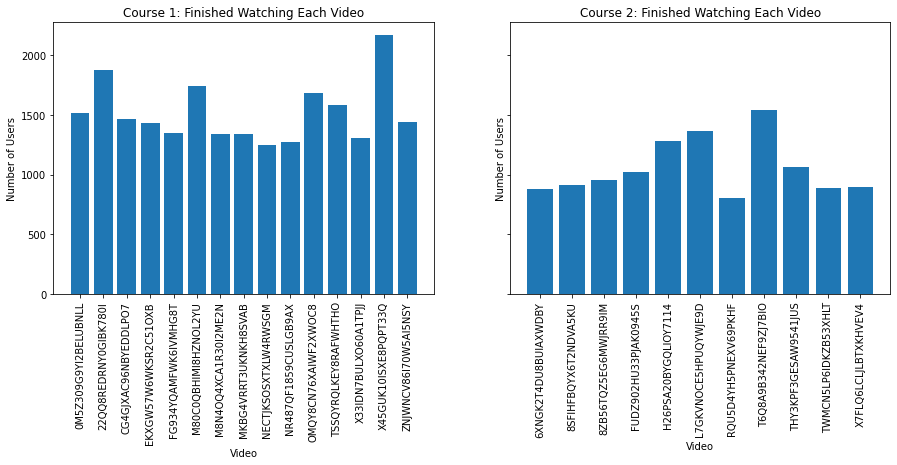

Total unique users in watch log @ course 1: 2299
Users that enrolled course 1 but did not watch any video: 1701


Total unique users in watch log @ course 2: 1742
Users that enrolled course 2 but did not watch any video: 2086


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax[0].bar(c1_group_video.index, c1_group_video['cv_uid'])
ax[0].set_xticklabels(c1_group_video.index, rotation=90)
ax[0].set_title("Course 1: Finished Watching Each Video")
ax[0].set_xlabel("Video")
ax[0].set_ylabel("Number of Users")

ax[1].bar(c2_group_video.index, c2_group_video['cv_uid'])
ax[1].set_xticklabels(c2_group_video.index, rotation=90)
ax[1].set_title("Course 2: Finished Watching Each Video")
ax[1].set_xlabel("Video")
ax[1].set_ylabel("Number of Users")
plt.show()

print("Total unique users in watch log @ course 1: " + str(c1_watch_log['cv_uid'].nunique()))
print("Users that enrolled course 1 but did not watch any video: " + str(len(c1_enrolled_array) - c1_watch_log['cv_uid'].nunique()))
print("\n")
print("Total unique users in watch log @ course 2: " + str(c2_watch_log['cv_uid'].nunique()))
print("Users that enrolled course 2 but did not watch any video: " + str(len(c2_enrolled_array) - c2_watch_log['cv_uid'].nunique()))

# Export CSV file for Finished Watching Video State Diagram

In [ ]:
# create video order array @ course 1
c1_completed_pivot = pd.pivot_table(c1_finished_watch_log[c1_finished_watch_log['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')
c1_order_video_array = []
for video in c1_video_array:
  index = int(c1_completed_pivot[video].value_counts().index[0]-101)
  c1_order_video_array.insert(index, video)

# create video order array @ course 2
c2_completed_pivot = pd.pivot_table(c2_finished_watch_log[c2_finished_watch_log['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')
c2_order_video_array = []
for video in c2_video_array:
  index = int(c2_completed_pivot[video].value_counts().index[0]-101)
  c2_order_video_array.insert(index, video)

In [ ]:
print(c1_order_video_array)
print(c2_order_video_array)

['X45GUK10ISXE8PQPT33Q', '22QQ8REDRNY0GIBK780I', 'M80C0QBHIMI8HZNOL2YU', 'OMQY8CN76XAIWF2XWOC8', 'TSSQYRQLKEY8RAFWHTHO', '0M5Z309G9YI2BELUBNLL', 'CG4GJXAC96NBYEDDLPO7', 'ZNJWNCV86I70W5AI5NSY', 'EKXGW57W6WKSR2C51OXB', 'M8N4OQ4XCA1R30I2ME2N', 'MKBG4VRRT3UKNKH8SVAB', 'FG934YQAMFWK6IVMHG8T', 'X33IDN7BULXO60A1TPJJ', 'NR487QF1859CUSLGB9AX', 'NECTJKSOSXTXLW4RWSGM']
['T6Q8A9B342NEF9ZJ7BIO', 'L7GKVNOCE5HPUQYWJE9D', 'H26PSA20BYGQLIOY7114', 'THY3KPF3GESAW9541JUS', 'FUDZ902HU33PJAK0945S', '8SFIHFBQYX6T2NDVA5KU', '8ZB56TQZ5EG6MWJRR9IM', 'TWMCN5LP6IDKZB53XHLT', 'RQU5D4YH5PNEXV69PKHF', '6XNGK2T4DU8BUIAXWDBY', 'X7FLQ6LCLJLBTXKHVEV4']


In [ ]:
# change 1 = completed or 0 = not-completed
# finished video state diagram @ course 1
c1_state_diagram = pd.pivot_table(c1_finished_watch_log[c1_finished_watch_log['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')

# finished video state diagram @ course 2
c2_state_diagram = pd.pivot_table(c2_finished_watch_log[c2_finished_watch_log['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')

In [ ]:
display(c1_state_diagram.head())
display(c2_state_diagram.head())

video_source_id,0M5Z309G9YI2BELUBNLL,22QQ8REDRNY0GIBK780I,CG4GJXAC96NBYEDDLPO7,EKXGW57W6WKSR2C51OXB,FG934YQAMFWK6IVMHG8T,M80C0QBHIMI8HZNOL2YU,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,NECTJKSOSXTXLW4RWSGM,NR487QF1859CUSLGB9AX,OMQY8CN76XAIWF2XWOC8,TSSQYRQLKEY8RAFWHTHO,X33IDN7BULXO60A1TPJJ,X45GUK10ISXE8PQPT33Q,ZNJWNCV86I70W5AI5NSY
cv_uid,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,106.0,102.0,107.0,109.0,111.0,103.0,115.0,110.0,114.0,113.0,104.0,105.0,112.0,101.0,108.0
012REYX36T3HMYZV2001,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
03IWBSK870LW3IYRC09S,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
05979TAHETK9A5TOMQVA,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
05KEEKBUFI6QTAC1PCE2,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0


video_source_id,6XNGK2T4DU8BUIAXWDBY,8SFIHFBQYX6T2NDVA5KU,8ZB56TQZ5EG6MWJRR9IM,FUDZ902HU33PJAK0945S,H26PSA20BYGQLIOY7114,L7GKVNOCE5HPUQYWJE9D,RQU5D4YH5PNEXV69PKHF,T6Q8A9B342NEF9ZJ7BIO,THY3KPF3GESAW9541JUS,TWMCN5LP6IDKZB53XHLT,X7FLQ6LCLJLBTXKHVEV4
cv_uid,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0
00PRZN8YTKUT9J30QZX5,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0
012REYX36T3HMYZV2001,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0
02N25S42ZHC00YSWGJWH,109.0,106.0,107.0,105.0,103.0,102.0,NaN,101.0,104.0,108.0,110.0
0364AWOA2J7R9BPIZGGX,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0


In [ ]:
# order columns in video order @ course 1
c1_order_state_diagram = c1_state_diagram[c1_order_video_array]

# order columns in video order @ course 2
c2_order_state_diagram = c2_state_diagram[c2_order_video_array]

In [ ]:
display(c1_order_state_diagram.head())
display(c2_order_state_diagram.head())

video_source_id,X45GUK10ISXE8PQPT33Q,22QQ8REDRNY0GIBK780I,M80C0QBHIMI8HZNOL2YU,OMQY8CN76XAIWF2XWOC8,TSSQYRQLKEY8RAFWHTHO,0M5Z309G9YI2BELUBNLL,CG4GJXAC96NBYEDDLPO7,ZNJWNCV86I70W5AI5NSY,EKXGW57W6WKSR2C51OXB,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,FG934YQAMFWK6IVMHG8T,X33IDN7BULXO60A1TPJJ,NR487QF1859CUSLGB9AX,NECTJKSOSXTXLW4RWSGM
cv_uid,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,115.0,110.0,111.0,112.0,113.0,114.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
03IWBSK870LW3IYRC09S,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
05979TAHETK9A5TOMQVA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
05KEEKBUFI6QTAC1PCE2,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


video_source_id,T6Q8A9B342NEF9ZJ7BIO,L7GKVNOCE5HPUQYWJE9D,H26PSA20BYGQLIOY7114,THY3KPF3GESAW9541JUS,FUDZ902HU33PJAK0945S,8SFIHFBQYX6T2NDVA5KU,8ZB56TQZ5EG6MWJRR9IM,TWMCN5LP6IDKZB53XHLT,RQU5D4YH5PNEXV69PKHF,6XNGK2T4DU8BUIAXWDBY,X7FLQ6LCLJLBTXKHVEV4
cv_uid,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
00PRZN8YTKUT9J30QZX5,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
02N25S42ZHC00YSWGJWH,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,NaN,109.0,110.0
0364AWOA2J7R9BPIZGGX,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0


In [ ]:
def col_rename(order_video_array):
  col_dict = {}
  count = 1
  for video in order_video_array:
    col_dict[video] = 'V' + str(count)
    count += 1

  return col_dict

In [ ]:
# create column dict @ course 1
c1_col_name = col_rename(c1_order_video_array)

# create column dict @ course 2
c2_col_name = col_rename(c2_order_video_array)

In [ ]:
print(c1_col_name)
print(c2_col_name)

{'X45GUK10ISXE8PQPT33Q': 'V1', '22QQ8REDRNY0GIBK780I': 'V2', 'M80C0QBHIMI8HZNOL2YU': 'V3', 'OMQY8CN76XAIWF2XWOC8': 'V4', 'TSSQYRQLKEY8RAFWHTHO': 'V5', '0M5Z309G9YI2BELUBNLL': 'V6', 'CG4GJXAC96NBYEDDLPO7': 'V7', 'ZNJWNCV86I70W5AI5NSY': 'V8', 'EKXGW57W6WKSR2C51OXB': 'V9', 'M8N4OQ4XCA1R30I2ME2N': 'V10', 'MKBG4VRRT3UKNKH8SVAB': 'V11', 'FG934YQAMFWK6IVMHG8T': 'V12', 'X33IDN7BULXO60A1TPJJ': 'V13', 'NR487QF1859CUSLGB9AX': 'V14', 'NECTJKSOSXTXLW4RWSGM': 'V15'}
{'T6Q8A9B342NEF9ZJ7BIO': 'V1', 'L7GKVNOCE5HPUQYWJE9D': 'V2', 'H26PSA20BYGQLIOY7114': 'V3', 'THY3KPF3GESAW9541JUS': 'V4', 'FUDZ902HU33PJAK0945S': 'V5', '8SFIHFBQYX6T2NDVA5KU': 'V6', '8ZB56TQZ5EG6MWJRR9IM': 'V7', 'TWMCN5LP6IDKZB53XHLT': 'V8', 'RQU5D4YH5PNEXV69PKHF': 'V9', '6XNGK2T4DU8BUIAXWDBY': 'V10', 'X7FLQ6LCLJLBTXKHVEV4': 'V11'}


In [ ]:
# rename columns @ course 1
c1_order_state_diagram.rename(columns=c1_col_name, inplace=True)

# rename columns @ course 2
c2_order_state_diagram.rename(columns=c2_col_name, inplace=True)

In [ ]:
display(c1_order_state_diagram.head())
display(c2_order_state_diagram.head())

video_source_id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
cv_uid,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,115.0,110.0,111.0,112.0,113.0,114.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
03IWBSK870LW3IYRC09S,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
05979TAHETK9A5TOMQVA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
05KEEKBUFI6QTAC1PCE2,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


video_source_id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cv_uid,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
00PRZN8YTKUT9J30QZX5,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
02N25S42ZHC00YSWGJWH,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,NaN,109.0,110.0
0364AWOA2J7R9BPIZGGX,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0


In [ ]:
# export CSV for state diagram @ course 1
c1_order_state_diagram.to_csv('c1_completed_video_state_diagram.csv', index=False)

# export CSV for state diagram @ course 2
c2_order_state_diagram.to_csv('c2_completed_video_state_diagram.csv', index=False)

In [ ]:
#  test reading csv file
c1_state_diagram_test = pd.read_csv('c1_completed_video_state_diagram.csv')
c2_state_diagram_test = pd.read_csv('c2_completed_video_state_diagram.csv')

In [ ]:
display(c1_state_diagram_test.head())
print("\n")
display(c2_state_diagram_test.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,115.0,110.0,111.0,112.0,113.0,114.0
1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
2,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
3,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
4,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
2,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
3,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,NaN,109.0,110.0
4,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0


In [ ]:
# download course 1 state diagram
files.download('c1_completed_video_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download course 2 state diagram
files.download('c2_completed_video_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# completed
# not-completed
# แก้ code ใน cell แรกของ section นี้ และแก้ชื่อไฟล์

# Order of Video by timestamp that each user first time opened it

In [ ]:
display(c1_watch_log.head())
display(c2_watch_log.head())

,cv_uid,video_source_id,cliptime,timestamp,state,completed
2401422,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,1,0
2401443,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1507515607,1,0
2401582,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1507515712,1,0
2411698,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.243,1507520603,1,0
2411751,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,20.236,1507520620,1,0


,cv_uid,video_source_id,cliptime,timestamp,state,completed
3952837,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1513045596,1,1
3952839,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,20.346,1513045617,1,1
3952843,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,46.986,1513045689,1,1
3952845,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,66.987,1513045709,1,1
3952847,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,84.068,1513045730,1,1


In [ ]:
# @ course 1
c1_first_open = c1_watch_log.sort_values('timestamp').drop_duplicates(['cv_uid', 'video_source_id'])

# @ course 2
c2_first_open = c2_watch_log.sort_values('timestamp').drop_duplicates(['cv_uid', 'video_source_id'])

In [ ]:
display(c1_first_open.head())
display(c2_first_open.head())

,cv_uid,video_source_id,cliptime,timestamp,state,completed
2401422,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,1,0
2401582,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1507515712,1,0
2413715,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,0.526,1507521381,1,0
2419103,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,0.288,1507523255,1,0
2420656,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,0.555,1507523762,1,0


,cv_uid,video_source_id,cliptime,timestamp,state,completed
3952837,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1513045596,1,1
3953696,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,0.621,1513047574,1,0
3955363,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,0.232,1513049554,1,0
3956124,NVMBB7GEKFQ5TW8RF8LC,L7GKVNOCE5HPUQYWJE9D,0.429,1513050113,1,0
3958443,NVMBB7GEKFQ5TW8RF8LC,H26PSA20BYGQLIOY7114,0.114,1513051791,1,0


In [ ]:
def order_video(row, watch_log):
  cv_uid_df = watch_log[watch_log['cv_uid'] == row['cv_uid']]
  cv_uid_df.reset_index(drop=True, inplace=True)
  number = cv_uid_df[cv_uid_df['video_source_id'] == row['video_source_id']].index.tolist()[0]
  row['order'] = number+101
  return row

In [ ]:
# add order column @ course 1
c1_first_open = c1_first_open.apply(lambda x: order_video(x, c1_first_open), axis=1)

# add order column @ course 2
c2_first_open = c2_first_open.apply(lambda x: order_video(x, c2_first_open), axis=1)

In [ ]:
display(c1_first_open.head())
display(c2_first_open.head())

,cv_uid,video_source_id,cliptime,timestamp,state,completed,order
2401422,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,1,0,101
2401582,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1507515712,1,0,101
2413715,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,0.526,1507521381,1,0,102
2419103,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,0.288,1507523255,1,0,103
2420656,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,0.555,1507523762,1,0,104


,cv_uid,video_source_id,cliptime,timestamp,state,completed,order
3952837,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1513045596,1,1,101
3953696,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,0.621,1513047574,1,0,101
3955363,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,0.232,1513049554,1,0,101
3956124,NVMBB7GEKFQ5TW8RF8LC,L7GKVNOCE5HPUQYWJE9D,0.429,1513050113,1,0,102
3958443,NVMBB7GEKFQ5TW8RF8LC,H26PSA20BYGQLIOY7114,0.114,1513051791,1,0,103


# Export CSV file for First Time Opened Video State Diagram

In [ ]:
# create first video order array @ course 1
c1_first_completed_pivot = pd.pivot_table(c1_first_open[c1_first_open['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')
c1_first_order_video_array = []
for video in c1_video_array:
  index = int(c1_first_completed_pivot[video].value_counts().index[0]-101)
  c1_first_order_video_array.insert(index, video)

# create first video order array @ course 2
c2_first_completed_pivot = pd.pivot_table(c2_first_open[c2_first_open['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')
c2_first_order_video_array = []
for video in c2_video_array:
  index = int(c2_first_completed_pivot[video].value_counts().index[0]-101)
  c2_first_order_video_array.insert(index, video)

In [ ]:
print(c1_first_order_video_array)
print(c2_first_order_video_array)

['X45GUK10ISXE8PQPT33Q', '22QQ8REDRNY0GIBK780I', 'M80C0QBHIMI8HZNOL2YU', 'OMQY8CN76XAIWF2XWOC8', 'TSSQYRQLKEY8RAFWHTHO', '0M5Z309G9YI2BELUBNLL', 'CG4GJXAC96NBYEDDLPO7', 'ZNJWNCV86I70W5AI5NSY', 'EKXGW57W6WKSR2C51OXB', 'M8N4OQ4XCA1R30I2ME2N', 'MKBG4VRRT3UKNKH8SVAB', 'FG934YQAMFWK6IVMHG8T', 'X33IDN7BULXO60A1TPJJ', 'NR487QF1859CUSLGB9AX', 'NECTJKSOSXTXLW4RWSGM']
['T6Q8A9B342NEF9ZJ7BIO', 'L7GKVNOCE5HPUQYWJE9D', 'H26PSA20BYGQLIOY7114', 'THY3KPF3GESAW9541JUS', 'FUDZ902HU33PJAK0945S', '8SFIHFBQYX6T2NDVA5KU', '8ZB56TQZ5EG6MWJRR9IM', 'TWMCN5LP6IDKZB53XHLT', 'RQU5D4YH5PNEXV69PKHF', '6XNGK2T4DU8BUIAXWDBY', 'X7FLQ6LCLJLBTXKHVEV4']


In [ ]:
# change 1 = completed or 0 = not-completed
# first opened state diagram @ course 1
c1_first_state_diagram = pd.pivot_table(c1_first_open[c1_first_open['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')

# first opened state diagram  @ course 2
c2_first_state_diagram = pd.pivot_table(c2_first_open[c2_first_open['completed'] == 1], values='order', index='cv_uid', columns='video_source_id')

In [ ]:
display(c1_first_state_diagram.head())
display(c2_first_state_diagram.head())

video_source_id,0M5Z309G9YI2BELUBNLL,22QQ8REDRNY0GIBK780I,CG4GJXAC96NBYEDDLPO7,EKXGW57W6WKSR2C51OXB,FG934YQAMFWK6IVMHG8T,M80C0QBHIMI8HZNOL2YU,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,NECTJKSOSXTXLW4RWSGM,NR487QF1859CUSLGB9AX,OMQY8CN76XAIWF2XWOC8,TSSQYRQLKEY8RAFWHTHO,X33IDN7BULXO60A1TPJJ,X45GUK10ISXE8PQPT33Q,ZNJWNCV86I70W5AI5NSY
cv_uid,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
012REYX36T3HMYZV2001,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
03IWBSK870LW3IYRC09S,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
05979TAHETK9A5TOMQVA,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
05KEEKBUFI6QTAC1PCE2,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0


video_source_id,6XNGK2T4DU8BUIAXWDBY,8SFIHFBQYX6T2NDVA5KU,8ZB56TQZ5EG6MWJRR9IM,FUDZ902HU33PJAK0945S,H26PSA20BYGQLIOY7114,L7GKVNOCE5HPUQYWJE9D,RQU5D4YH5PNEXV69PKHF,T6Q8A9B342NEF9ZJ7BIO,THY3KPF3GESAW9541JUS,TWMCN5LP6IDKZB53XHLT,X7FLQ6LCLJLBTXKHVEV4
cv_uid,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0
00PRZN8YTKUT9J30QZX5,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0
012REYX36T3HMYZV2001,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0
02N25S42ZHC00YSWGJWH,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0
0364AWOA2J7R9BPIZGGX,110.0,106.0,107.0,105.0,103.0,102.0,109.0,101.0,104.0,108.0,111.0


In [ ]:
# order columns in video order @ course 1
c1_first_order_state_diagram = c1_first_state_diagram[c1_order_video_array]

# order columns in video order @ course 2
c2_first_order_state_diagram = c2_first_state_diagram[c2_order_video_array]

In [ ]:
def col_rename(order_video_array):
  col_dict = {}
  count = 1
  for video in order_video_array:
    col_dict[video] = 'V' + str(count)
    count += 1

  return col_dict

In [ ]:
# create column dict @ course 1
c1_first_col_name = col_rename(c1_order_video_array)

# create column dict @ course 2
c2_first_col_name = col_rename(c2_order_video_array)

In [ ]:
print(c1_first_col_name)
print(c2_first_col_name)

{'X45GUK10ISXE8PQPT33Q': 'V1', '22QQ8REDRNY0GIBK780I': 'V2', 'M80C0QBHIMI8HZNOL2YU': 'V3', 'OMQY8CN76XAIWF2XWOC8': 'V4', 'TSSQYRQLKEY8RAFWHTHO': 'V5', '0M5Z309G9YI2BELUBNLL': 'V6', 'CG4GJXAC96NBYEDDLPO7': 'V7', 'ZNJWNCV86I70W5AI5NSY': 'V8', 'EKXGW57W6WKSR2C51OXB': 'V9', 'M8N4OQ4XCA1R30I2ME2N': 'V10', 'MKBG4VRRT3UKNKH8SVAB': 'V11', 'FG934YQAMFWK6IVMHG8T': 'V12', 'X33IDN7BULXO60A1TPJJ': 'V13', 'NR487QF1859CUSLGB9AX': 'V14', 'NECTJKSOSXTXLW4RWSGM': 'V15'}
{'T6Q8A9B342NEF9ZJ7BIO': 'V1', 'L7GKVNOCE5HPUQYWJE9D': 'V2', 'H26PSA20BYGQLIOY7114': 'V3', 'THY3KPF3GESAW9541JUS': 'V4', 'FUDZ902HU33PJAK0945S': 'V5', '8SFIHFBQYX6T2NDVA5KU': 'V6', '8ZB56TQZ5EG6MWJRR9IM': 'V7', 'TWMCN5LP6IDKZB53XHLT': 'V8', 'RQU5D4YH5PNEXV69PKHF': 'V9', '6XNGK2T4DU8BUIAXWDBY': 'V10', 'X7FLQ6LCLJLBTXKHVEV4': 'V11'}


In [ ]:
# rename columns @ course 1
c1_first_order_state_diagram.rename(columns=c1_first_col_name, inplace=True)

# rename columns @ course 2
c2_first_order_state_diagram.rename(columns=c2_first_col_name, inplace=True)

In [ ]:
display(c1_first_order_state_diagram.head())
display(c2_first_order_state_diagram.head())

video_source_id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
cv_uid,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
03IWBSK870LW3IYRC09S,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
05979TAHETK9A5TOMQVA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
05KEEKBUFI6QTAC1PCE2,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


video_source_id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cv_uid,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
00PRZN8YTKUT9J30QZX5,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
02N25S42ZHC00YSWGJWH,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
0364AWOA2J7R9BPIZGGX,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0


In [ ]:
# export CSV for state diagram @ course 1
c1_first_order_state_diagram.to_csv('c1_completed_first_video_state_diagram.csv', index=False)

# export CSV for state diagram @ course 2
c2_first_order_state_diagram.to_csv('c2_completed_first_video_state_diagram.csv', index=False)

In [ ]:
#  test reading csv file
c1_first_state_diagram_test = pd.read_csv('c1_completed_first_video_state_diagram.csv')
c2_first_state_diagram_test = pd.read_csv('c2_completed_first_video_state_diagram.csv')

In [ ]:
display(c1_first_state_diagram_test.head())
print("\n")
display(c2_first_state_diagram_test.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
2,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
3,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
4,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
2,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
3,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0
4,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0


In [ ]:
# download course 1 state diagram
files.download('c1_completed_first_video_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download course 2 state diagram
files.download('c2_completed_first_video_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Quiz Submitted Order

In [ ]:
# first submitted of each quiz of each user
# quiz submitted @ course 1
c1_quiz_submitted = c1_user_log[c1_user_log['action_type'] == 'quiz_submitted']
c1_quiz_submitted = c1_quiz_submitted.drop_duplicates(['cv_uid', 'cv_cid', 'assoc_id'])
c1_quiz_submitted.drop(['record_id', 'cv_cid', 'action_type', 'assoc_id2'], axis=1, inplace=True)

# quiz submitted @ course 2
c2_quiz_submitted = c2_user_log[c2_user_log['action_type'] == 'quiz_submitted']
c2_quiz_submitted = c2_quiz_submitted.drop_duplicates(['cv_uid', 'cv_cid', 'assoc_id'])
c2_quiz_submitted.drop(['record_id', 'cv_cid', 'action_type', 'assoc_id2'], axis=1, inplace=True)

In [ ]:
display(c1_quiz_submitted.head())
display(c2_quiz_submitted.head())

,cv_uid,assoc_id,timestamp
732990,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,1546826587
733002,6AFV1E84QXRHV3IQZDVD,EEPHRRJS71QB8ZJP7MIT,1546826941
733010,6AFV1E84QXRHV3IQZDVD,LANPBO6667YUN6JLJU8F,1546827063
733029,6AFV1E84QXRHV3IQZDVD,ZQWTRFH48Z8OW7EWMG52,1546827530
733039,6AFV1E84QXRHV3IQZDVD,H59AAI3DCTNSCN5EU5EC,1546827661


,cv_uid,assoc_id,timestamp
573362,PZ8JBP8PLKB0RQ059DC5,H2JAJIK0H12LT6NOKGJX,1544510984
573439,PZ8JBP8PLKB0RQ059DC5,UZ575QUHBZOTBQOKEZ2H,1544511557
576316,9NCGBCHXB94IW1IXQ1HV,H3W338MV1JEU9QG0UCP1,1544580339
576329,1E526W7YNWQ7J4HAJRKG,H3W338MV1JEU9QG0UCP1,1544580365
576422,DIV51XH24QNG3CBM5A6U,H3W338MV1JEU9QG0UCP1,1544580631


In [ ]:
# function to apply completed as 1 and not completed as 0
def completed_or_not(row, course_completed_array):
  if row in course_completed_array:
    return 1
  else:
    return 0

In [ ]:
# add completed column @ course 1
c1_quiz_submitted['completed'] = c1_quiz_submitted['cv_uid'].apply(lambda x: completed_or_not(x, c1_completed_array))

# add completed column @ course 2
c2_quiz_submitted['completed'] = c2_quiz_submitted['cv_uid'].apply(lambda x: completed_or_not(x, c2_completed_array))

In [ ]:
print("Total users completed @ course 1: " + str(len(c1_completed_array)))
print("Total unique users completed from quiz_submitted @ course 1: " + str(c1_quiz_submitted[c1_quiz_submitted['completed'] == 1]['cv_uid'].nunique()))
display(c1_quiz_submitted.head())

print("\n")

print("Total users completed @ course 2: " + str(len(c2_completed_array)))
print("Total unique users completed from quiz_submitted @ course 2: " + str(c2_quiz_submitted[c2_quiz_submitted['completed'] == 1]['cv_uid'].nunique()))
display(c2_quiz_submitted.head())

Total users completed @ course 1: 1326
Total unique users completed from quiz_submitted @ course 1: 1326


,cv_uid,assoc_id,timestamp,completed
732990,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,1546826587,1
733002,6AFV1E84QXRHV3IQZDVD,EEPHRRJS71QB8ZJP7MIT,1546826941,1
733010,6AFV1E84QXRHV3IQZDVD,LANPBO6667YUN6JLJU8F,1546827063,1
733029,6AFV1E84QXRHV3IQZDVD,ZQWTRFH48Z8OW7EWMG52,1546827530,1
733039,6AFV1E84QXRHV3IQZDVD,H59AAI3DCTNSCN5EU5EC,1546827661,1




Total users completed @ course 2: 884
Total unique users completed from quiz_submitted @ course 2: 884


,cv_uid,assoc_id,timestamp,completed
573362,PZ8JBP8PLKB0RQ059DC5,H2JAJIK0H12LT6NOKGJX,1544510984,0
573439,PZ8JBP8PLKB0RQ059DC5,UZ575QUHBZOTBQOKEZ2H,1544511557,0
576316,9NCGBCHXB94IW1IXQ1HV,H3W338MV1JEU9QG0UCP1,1544580339,0
576329,1E526W7YNWQ7J4HAJRKG,H3W338MV1JEU9QG0UCP1,1544580365,0
576422,DIV51XH24QNG3CBM5A6U,H3W338MV1JEU9QG0UCP1,1544580631,0


In [ ]:
# quiz id array @ course 1
c1_quiz_array = c1_quiz_submitted['assoc_id'].unique()

# quiz id array @ course 2
c2_quiz_array = c2_quiz_submitted['assoc_id'].unique()

In [ ]:
print("Total Quiz @ course 1: " + str(len(c1_quiz_array)))
print(c1_quiz_array)
print("\n")
print("Total Quiz @ course 2: " + str(len(c2_quiz_array)))
print(c2_quiz_array)

Total Quiz @ course 1: 6
['D6RL6F8ZMBYOG1K31L0W' 'EEPHRRJS71QB8ZJP7MIT' 'LANPBO6667YUN6JLJU8F'
 'ZQWTRFH48Z8OW7EWMG52' 'H59AAI3DCTNSCN5EU5EC' 'W0O7ARGWYKORU29CAIX1']


Total Quiz @ course 2: 11
['H2JAJIK0H12LT6NOKGJX' 'UZ575QUHBZOTBQOKEZ2H' 'H3W338MV1JEU9QG0UCP1'
 'WHJBBBGVHN744OFXZYL2' 'T1Q6U7M2F64PPHGRNDNU' 'UDA8CQE8U16K5C78FIX1'
 '7NA6L93RGO0WIOHDVJVO' 'VL5BT36I1AOGDC7BM2NF' 'GBRSUDIKK3TKN1Y8B7EG'
 'QSIQ9R5ZDRL1VOA6Z5Q9' 'QZRVYL4LE89RW6Z77QRB']


In [ ]:
def order_quiz(row, quiz_submitted):
  cv_uid_df = quiz_submitted[quiz_submitted['cv_uid'] == row['cv_uid']]
  cv_uid_df.reset_index(drop=True, inplace=True)
  number = cv_uid_df[cv_uid_df['assoc_id'] == row['assoc_id']].index.tolist()[0]
  row['order'] = number+101
  return row

In [ ]:
# add order column @ course 1
c1_quiz_submitted = c1_quiz_submitted.apply(lambda x: order_quiz(x, c1_quiz_submitted), axis=1)

# add order column @ course 2
c2_quiz_submitted = c2_quiz_submitted.apply(lambda x: order_quiz(x, c2_quiz_submitted), axis=1)

In [ ]:
display(c1_quiz_submitted.head())
display(c2_quiz_submitted.head())

,cv_uid,assoc_id,timestamp,completed,order
732990,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,1546826587,1,101
733002,6AFV1E84QXRHV3IQZDVD,EEPHRRJS71QB8ZJP7MIT,1546826941,1,102
733010,6AFV1E84QXRHV3IQZDVD,LANPBO6667YUN6JLJU8F,1546827063,1,103
733029,6AFV1E84QXRHV3IQZDVD,ZQWTRFH48Z8OW7EWMG52,1546827530,1,104
733039,6AFV1E84QXRHV3IQZDVD,H59AAI3DCTNSCN5EU5EC,1546827661,1,105


,cv_uid,assoc_id,timestamp,completed,order
573362,PZ8JBP8PLKB0RQ059DC5,H2JAJIK0H12LT6NOKGJX,1544510984,0,101
573439,PZ8JBP8PLKB0RQ059DC5,UZ575QUHBZOTBQOKEZ2H,1544511557,0,102
576316,9NCGBCHXB94IW1IXQ1HV,H3W338MV1JEU9QG0UCP1,1544580339,0,101
576329,1E526W7YNWQ7J4HAJRKG,H3W338MV1JEU9QG0UCP1,1544580365,0,101
576422,DIV51XH24QNG3CBM5A6U,H3W338MV1JEU9QG0UCP1,1544580631,0,101


# Export CSV file for Quiz Submitted State Diagram

In [ ]:
# create video order array @ course 1
c1_submitted_pivot = pd.pivot_table(c1_quiz_submitted[c1_quiz_submitted['completed'] == 1], values='order', index='cv_uid', columns='assoc_id')
c1_order_quiz_array = []
for quiz in c1_quiz_array:
  index = int(c1_submitted_pivot[quiz].value_counts().index[0]-101)
  c1_order_quiz_array.insert(index, quiz)

# create video order array @ course 2
c2_submitted_pivot = pd.pivot_table(c2_quiz_submitted[c2_quiz_submitted['completed'] == 1], values='order', index='cv_uid', columns='assoc_id')
c2_order_quiz_array = []
for quiz in c2_quiz_array:
  index = int(c2_submitted_pivot[quiz].value_counts().index[0]-101)
  c2_order_quiz_array.insert(index, quiz)

In [ ]:
print(c1_order_quiz_array)
print(c2_order_quiz_array)

['D6RL6F8ZMBYOG1K31L0W', 'EEPHRRJS71QB8ZJP7MIT', 'LANPBO6667YUN6JLJU8F', 'ZQWTRFH48Z8OW7EWMG52', 'H59AAI3DCTNSCN5EU5EC', 'W0O7ARGWYKORU29CAIX1']
['H3W338MV1JEU9QG0UCP1', 'H2JAJIK0H12LT6NOKGJX', 'UZ575QUHBZOTBQOKEZ2H', 'WHJBBBGVHN744OFXZYL2', 'T1Q6U7M2F64PPHGRNDNU', 'UDA8CQE8U16K5C78FIX1', '7NA6L93RGO0WIOHDVJVO', 'VL5BT36I1AOGDC7BM2NF', 'GBRSUDIKK3TKN1Y8B7EG', 'QSIQ9R5ZDRL1VOA6Z5Q9', 'QZRVYL4LE89RW6Z77QRB']


In [ ]:
# change 1 = completed or 0 = not-completed
# quiz state diagram @ course 1
c1_quiz_state_diagram = pd.pivot_table(c1_quiz_submitted[c1_quiz_submitted['completed'] == 1], values='order', index='cv_uid', columns='assoc_id')

# quiz state diagram @ course 2
c2_quiz_state_diagram = pd.pivot_table(c2_quiz_submitted[c2_quiz_submitted['completed'] == 1], values='order', index='cv_uid', columns='assoc_id')

In [ ]:
display(c1_quiz_state_diagram.head())
display(c2_quiz_state_diagram.head())

assoc_id,D6RL6F8ZMBYOG1K31L0W,EEPHRRJS71QB8ZJP7MIT,H59AAI3DCTNSCN5EU5EC,LANPBO6667YUN6JLJU8F,W0O7ARGWYKORU29CAIX1,ZQWTRFH48Z8OW7EWMG52
cv_uid,,,,,,
00UAS3P4F2CM8TS01Q25,101,102,105,103,106,104
012REYX36T3HMYZV2001,101,102,105,103,106,104
0364AWOA2J7R9BPIZGGX,101,102,105,103,106,104
03IWBSK870LW3IYRC09S,101,102,105,103,106,104
05979TAHETK9A5TOMQVA,101,102,105,103,106,104


assoc_id,7NA6L93RGO0WIOHDVJVO,GBRSUDIKK3TKN1Y8B7EG,H2JAJIK0H12LT6NOKGJX,H3W338MV1JEU9QG0UCP1,QSIQ9R5ZDRL1VOA6Z5Q9,QZRVYL4LE89RW6Z77QRB,T1Q6U7M2F64PPHGRNDNU,UDA8CQE8U16K5C78FIX1,UZ575QUHBZOTBQOKEZ2H,VL5BT36I1AOGDC7BM2NF,WHJBBBGVHN744OFXZYL2
cv_uid,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,107,109,102,101,110,111,105,106,103,108,104
00PRZN8YTKUT9J30QZX5,107,109,102,101,110,111,105,106,103,108,104
012REYX36T3HMYZV2001,107,109,102,101,110,111,105,106,103,108,104
02N25S42ZHC00YSWGJWH,107,109,102,101,110,111,105,106,103,108,104
0364AWOA2J7R9BPIZGGX,107,109,102,101,110,111,105,106,103,108,104


In [ ]:
# order columns in video order @ course 1
c1_quiz_state_diagram = c1_quiz_state_diagram[c1_order_quiz_array]

# order columns in video order @ course 2
c2_quiz_state_diagram = c2_quiz_state_diagram[c2_order_quiz_array]
# if not-completed add [:-1] depend on course

In [ ]:
def col_rename(order_quiz_array):
  col_dict = {}
  count = 1
  for quiz in order_quiz_array:
    col_dict[quiz] = 'Q' + str(count)
    count += 1

  return col_dict

In [ ]:
# create column dict @ course 1
c1_quiz_col_name = col_rename(c1_order_quiz_array)

# create column dict @ course 2
c2_quiz_col_name = col_rename(c2_order_quiz_array)

In [ ]:
print(c1_quiz_col_name)
print(c2_quiz_col_name)

{'D6RL6F8ZMBYOG1K31L0W': 'Q1', 'EEPHRRJS71QB8ZJP7MIT': 'Q2', 'LANPBO6667YUN6JLJU8F': 'Q3', 'ZQWTRFH48Z8OW7EWMG52': 'Q4', 'H59AAI3DCTNSCN5EU5EC': 'Q5', 'W0O7ARGWYKORU29CAIX1': 'Q6'}
{'H3W338MV1JEU9QG0UCP1': 'Q1', 'H2JAJIK0H12LT6NOKGJX': 'Q2', 'UZ575QUHBZOTBQOKEZ2H': 'Q3', 'WHJBBBGVHN744OFXZYL2': 'Q4', 'T1Q6U7M2F64PPHGRNDNU': 'Q5', 'UDA8CQE8U16K5C78FIX1': 'Q6', '7NA6L93RGO0WIOHDVJVO': 'Q7', 'VL5BT36I1AOGDC7BM2NF': 'Q8', 'GBRSUDIKK3TKN1Y8B7EG': 'Q9', 'QSIQ9R5ZDRL1VOA6Z5Q9': 'Q10', 'QZRVYL4LE89RW6Z77QRB': 'Q11'}


In [ ]:
# rename columns @ course 1
c1_quiz_state_diagram.rename(columns=c1_quiz_col_name, inplace=True)

# rename columns @ course 2
c2_quiz_state_diagram.rename(columns=c2_quiz_col_name, inplace=True)

In [ ]:
display(c1_quiz_state_diagram.head())
display(c2_quiz_state_diagram.head())

assoc_id,Q1,Q2,Q3,Q4,Q5,Q6
cv_uid,,,,,,
00UAS3P4F2CM8TS01Q25,101,102,103,104,105,106
012REYX36T3HMYZV2001,101,102,103,104,105,106
0364AWOA2J7R9BPIZGGX,101,102,103,104,105,106
03IWBSK870LW3IYRC09S,101,102,103,104,105,106
05979TAHETK9A5TOMQVA,101,102,103,104,105,106


assoc_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
cv_uid,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101,102,103,104,105,106,107,108,109,110,111
00PRZN8YTKUT9J30QZX5,101,102,103,104,105,106,107,108,109,110,111
012REYX36T3HMYZV2001,101,102,103,104,105,106,107,108,109,110,111
02N25S42ZHC00YSWGJWH,101,102,103,104,105,106,107,108,109,110,111
0364AWOA2J7R9BPIZGGX,101,102,103,104,105,106,107,108,109,110,111


In [ ]:
# export CSV for state diagram @ course 1
c1_quiz_state_diagram.to_csv('c1_completed_quiz_state_diagram.csv', index=False)

# export CSV for state diagram @ course 2
c2_quiz_state_diagram.to_csv('c2_completed_quiz_state_diagram.csv', index=False)

In [ ]:
#  test reading csv file
c1_quiz_state_diagram_test = pd.read_csv('c1_completed_quiz_state_diagram.csv')
c2_quiz_state_diagram_test = pd.read_csv('c2_completed_quiz_state_diagram.csv')

In [ ]:
display(c1_quiz_state_diagram_test.head())
print("\n")
display(c2_quiz_state_diagram_test.head())

,Q1,Q2,Q3,Q4,Q5,Q6
0,101,102,103,104,105,106
1,101,102,103,104,105,106
2,101,102,103,104,105,106
3,101,102,103,104,105,106
4,101,102,103,104,105,106


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,101,102,103,104,105,106,107,108,109,110,111
1,101,102,103,104,105,106,107,108,109,110,111
2,101,102,103,104,105,106,107,108,109,110,111
3,101,102,103,104,105,106,107,108,109,110,111
4,101,102,103,104,105,106,107,108,109,110,111


In [ ]:
# download course 1 state diagram
files.download('c1_completed_quiz_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download course 2 state diagram
files.download('c2_completed_quiz_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Quiz Submitted + Finished Watching Video

In [ ]:
# drop columns @ course 1
c1_all_finished = c1_finished_watch_log.drop(['cliptime', 'order'], axis=1)
c1_all_finished.rename(columns={'video_source_id':'activity'}, inplace=True)
c1_all_submitted = c1_quiz_submitted.drop('order', axis=1)
c1_all_submitted.reset_index(drop=True, inplace=True)
c1_all_submitted.rename(columns={'assoc_id':'activity'}, inplace=True)

# drop columns @ course 2
c2_all_finished = c2_finished_watch_log.drop(['cliptime', 'order'], axis=1)
c2_all_finished.rename(columns={'video_source_id':'activity'}, inplace=True)
c2_all_submitted = c2_quiz_submitted.drop('order', axis=1)
c2_all_submitted.reset_index(drop=True, inplace=True)
c2_all_submitted.rename(columns={'assoc_id':'activity'}, inplace=True)

In [ ]:
display(c1_all_finished.head(1))
display(c2_all_finished.head(1))
display(c1_all_submitted.head(1))
display(c2_all_submitted.head(1))

,cv_uid,activity,timestamp,completed
0,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,1507521069,0


,cv_uid,activity,timestamp,completed
0,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,1513049928,0


,cv_uid,activity,timestamp,completed
0,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,1546826587,1


,cv_uid,activity,timestamp,completed
0,PZ8JBP8PLKB0RQ059DC5,H2JAJIK0H12LT6NOKGJX,1544510984,0


In [ ]:
# concat @ course 1
c1_all = pd.concat([c1_all_finished, c1_all_submitted], ignore_index=True)
c1_all = c1_all.sort_values('timestamp')
c1_all.reset_index(drop=True, inplace=True)

# concat @ course 2
c2_all = pd.concat([c2_all_finished, c2_all_submitted], ignore_index=True)
c2_all = c2_all.sort_values('timestamp')
c2_all.reset_index(drop=True, inplace=True)

In [ ]:
display(c1_all.head())
display(c2_all.head())

,cv_uid,activity,timestamp,completed
0,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,1507521069,0
1,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,1507522780,0
2,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,1507523537,0
3,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,1507523832,0
4,ZTMGT2XES5SP5HEP7136,TSSQYRQLKEY8RAFWHTHO,1507524422,0


,cv_uid,activity,timestamp,completed
0,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,1513049928,0
1,T4UPK6FEF54WXVNPLEFT,T6Q8A9B342NEF9ZJ7BIO,1513088387,0
2,A2DROF6SOL7X1Z9L5QJR,T6Q8A9B342NEF9ZJ7BIO,1513100228,0
3,A2DROF6SOL7X1Z9L5QJR,L7GKVNOCE5HPUQYWJE9D,1513100631,0
4,A2DROF6SOL7X1Z9L5QJR,H26PSA20BYGQLIOY7114,1513100985,0


In [ ]:
def order_all(row, all):
  cv_uid_df = all[all['cv_uid'] == row['cv_uid']]
  cv_uid_df.reset_index(drop=True, inplace=True)
  number = cv_uid_df[cv_uid_df['activity'] == row['activity']].index.tolist()[0]
  row['order'] = number+101
  return row

In [ ]:
# add order column @ course 1
c1_all = c1_all.apply(lambda x: order_all(x, c1_all), axis=1)

# add order column @ course 2
c2_all = c2_all.apply(lambda x: order_all(x, c2_all), axis=1)

In [ ]:
display(c1_all.head())
display(c2_all.head())

,cv_uid,activity,timestamp,completed,order
0,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,1507521069,0,101
1,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,1507522780,0,102
2,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,1507523537,0,103
3,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,1507523832,0,104
4,ZTMGT2XES5SP5HEP7136,TSSQYRQLKEY8RAFWHTHO,1507524422,0,105


,cv_uid,activity,timestamp,completed,order
0,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,1513049928,0,101
1,T4UPK6FEF54WXVNPLEFT,T6Q8A9B342NEF9ZJ7BIO,1513088387,0,101
2,A2DROF6SOL7X1Z9L5QJR,T6Q8A9B342NEF9ZJ7BIO,1513100228,0,101
3,A2DROF6SOL7X1Z9L5QJR,L7GKVNOCE5HPUQYWJE9D,1513100631,0,102
4,A2DROF6SOL7X1Z9L5QJR,H26PSA20BYGQLIOY7114,1513100985,0,103


# Export CSV file for Quiz Submitted + Finished Watching Video State Diagram

In [ ]:
# activity array @ course 1
c1_activity_array = np.append(c1_video_array, c1_quiz_array)

# activity array @ course 2
c2_activity_array = np.append(c2_video_array, c2_quiz_array)

In [ ]:
print("Total activities @ course 1: " + str(len(c1_activity_array)))
print(c1_activity_array)
print("\n")
print("Total activities @ course 2: " + str(len(c2_activity_array)))
print(c2_activity_array)

Total activities @ course 1: 21
['X45GUK10ISXE8PQPT33Q' '22QQ8REDRNY0GIBK780I' 'M80C0QBHIMI8HZNOL2YU'
 'OMQY8CN76XAIWF2XWOC8' 'TSSQYRQLKEY8RAFWHTHO' '0M5Z309G9YI2BELUBNLL'
 'CG4GJXAC96NBYEDDLPO7' 'ZNJWNCV86I70W5AI5NSY' 'EKXGW57W6WKSR2C51OXB'
 'M8N4OQ4XCA1R30I2ME2N' 'MKBG4VRRT3UKNKH8SVAB' 'FG934YQAMFWK6IVMHG8T'
 'X33IDN7BULXO60A1TPJJ' 'NR487QF1859CUSLGB9AX' 'NECTJKSOSXTXLW4RWSGM'
 'D6RL6F8ZMBYOG1K31L0W' 'EEPHRRJS71QB8ZJP7MIT' 'LANPBO6667YUN6JLJU8F'
 'ZQWTRFH48Z8OW7EWMG52' 'H59AAI3DCTNSCN5EU5EC' 'W0O7ARGWYKORU29CAIX1']


Total activities @ course 2: 22
['T6Q8A9B342NEF9ZJ7BIO' 'L7GKVNOCE5HPUQYWJE9D' 'H26PSA20BYGQLIOY7114'
 'THY3KPF3GESAW9541JUS' 'FUDZ902HU33PJAK0945S' '8SFIHFBQYX6T2NDVA5KU'
 '8ZB56TQZ5EG6MWJRR9IM' 'TWMCN5LP6IDKZB53XHLT' 'RQU5D4YH5PNEXV69PKHF'
 '6XNGK2T4DU8BUIAXWDBY' 'X7FLQ6LCLJLBTXKHVEV4' 'H2JAJIK0H12LT6NOKGJX'
 'UZ575QUHBZOTBQOKEZ2H' 'H3W338MV1JEU9QG0UCP1' 'WHJBBBGVHN744OFXZYL2'
 'T1Q6U7M2F64PPHGRNDNU' 'UDA8CQE8U16K5C78FIX1' '7NA6L93RGO0WIOHDVJVO'
 'VL5BT36I1AOGDC7BM2NF'

In [ ]:
# create activity order array @ course 1
c1_all_pivot = pd.pivot_table(c1_all[c1_all['completed'] == 1], values='order', index='cv_uid', columns='activity')
c1_order_activity_array = []
for activity in c1_activity_array:
  index = int(c1_all_pivot[activity].value_counts().index[0]-101)
  c1_order_activity_array.insert(index, activity)

# create activity order array @ course 2
c2_all_pivot = pd.pivot_table(c2_all[c2_all['completed'] == 1], values='order', index='cv_uid', columns='activity')
c2_order_activity_array = []
for activity in c2_activity_array:
  index = int(c2_all_pivot[activity].value_counts().index[0]-101)
  c2_order_activity_array.insert(index, activity)

In [ ]:
print(c1_order_activity_array)
print(c2_order_activity_array)

['D6RL6F8ZMBYOG1K31L0W', 'X45GUK10ISXE8PQPT33Q', 'EEPHRRJS71QB8ZJP7MIT', '22QQ8REDRNY0GIBK780I', 'LANPBO6667YUN6JLJU8F', 'M80C0QBHIMI8HZNOL2YU', 'ZQWTRFH48Z8OW7EWMG52', 'OMQY8CN76XAIWF2XWOC8', 'H59AAI3DCTNSCN5EU5EC', 'TSSQYRQLKEY8RAFWHTHO', '0M5Z309G9YI2BELUBNLL', 'CG4GJXAC96NBYEDDLPO7', 'ZNJWNCV86I70W5AI5NSY', 'EKXGW57W6WKSR2C51OXB', 'M8N4OQ4XCA1R30I2ME2N', 'MKBG4VRRT3UKNKH8SVAB', 'FG934YQAMFWK6IVMHG8T', 'X33IDN7BULXO60A1TPJJ', 'NR487QF1859CUSLGB9AX', 'NECTJKSOSXTXLW4RWSGM', 'W0O7ARGWYKORU29CAIX1']
['H3W338MV1JEU9QG0UCP1', 'T6Q8A9B342NEF9ZJ7BIO', 'L7GKVNOCE5HPUQYWJE9D', 'H2JAJIK0H12LT6NOKGJX', 'H26PSA20BYGQLIOY7114', 'UZ575QUHBZOTBQOKEZ2H', 'WHJBBBGVHN744OFXZYL2', 'THY3KPF3GESAW9541JUS', 'T1Q6U7M2F64PPHGRNDNU', 'FUDZ902HU33PJAK0945S', 'UDA8CQE8U16K5C78FIX1', '8SFIHFBQYX6T2NDVA5KU', '7NA6L93RGO0WIOHDVJVO', '8ZB56TQZ5EG6MWJRR9IM', 'VL5BT36I1AOGDC7BM2NF', 'TWMCN5LP6IDKZB53XHLT', 'GBRSUDIKK3TKN1Y8B7EG', 'RQU5D4YH5PNEXV69PKHF', 'QSIQ9R5ZDRL1VOA6Z5Q9', '6XNGK2T4DU8BUIAXWDBY', 'X7FLQ6LCLJLBT

In [ ]:
# change 1 = completed or 0 = not-completed
# quiz state diagram @ course 1
c1_all_state_diagram = pd.pivot_table(c1_all[c1_all['completed'] == 1], values='order', index='cv_uid', columns='activity')

# quiz state diagram @ course 2
c2_all_state_diagram = pd.pivot_table(c2_all[c2_all['completed'] == 1], values='order', index='cv_uid', columns='activity')

In [ ]:
display(c1_all_state_diagram.head())
display(c2_all_state_diagram.head())

activity,0M5Z309G9YI2BELUBNLL,22QQ8REDRNY0GIBK780I,CG4GJXAC96NBYEDDLPO7,D6RL6F8ZMBYOG1K31L0W,EEPHRRJS71QB8ZJP7MIT,EKXGW57W6WKSR2C51OXB,FG934YQAMFWK6IVMHG8T,H59AAI3DCTNSCN5EU5EC,LANPBO6667YUN6JLJU8F,M80C0QBHIMI8HZNOL2YU,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,NECTJKSOSXTXLW4RWSGM,NR487QF1859CUSLGB9AX,OMQY8CN76XAIWF2XWOC8,TSSQYRQLKEY8RAFWHTHO,W0O7ARGWYKORU29CAIX1,X33IDN7BULXO60A1TPJJ,X45GUK10ISXE8PQPT33Q,ZNJWNCV86I70W5AI5NSY,ZQWTRFH48Z8OW7EWMG52
cv_uid,,,,,,,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,111.0,104.0,112.0,101.0,103.0,114.0,116.0,109.0,105.0,106.0,121.0,115.0,119.0,118.0,108.0,110.0,120.0,117.0,102.0,113.0,107.0
012REYX36T3HMYZV2001,111.0,104.0,112.0,101.0,103.0,114.0,117.0,109.0,105.0,106.0,115.0,116.0,120.0,119.0,108.0,110.0,121.0,118.0,102.0,113.0,107.0
0364AWOA2J7R9BPIZGGX,NaN,NaN,NaN,101.0,102.0,NaN,NaN,105.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,104.0
03IWBSK870LW3IYRC09S,111.0,104.0,112.0,101.0,103.0,114.0,117.0,109.0,105.0,106.0,115.0,116.0,120.0,119.0,108.0,110.0,121.0,118.0,102.0,113.0,107.0
05979TAHETK9A5TOMQVA,111.0,104.0,112.0,101.0,103.0,114.0,117.0,109.0,105.0,106.0,115.0,116.0,120.0,119.0,108.0,110.0,121.0,118.0,102.0,113.0,107.0


activity,6XNGK2T4DU8BUIAXWDBY,7NA6L93RGO0WIOHDVJVO,8SFIHFBQYX6T2NDVA5KU,8ZB56TQZ5EG6MWJRR9IM,FUDZ902HU33PJAK0945S,GBRSUDIKK3TKN1Y8B7EG,H26PSA20BYGQLIOY7114,H2JAJIK0H12LT6NOKGJX,H3W338MV1JEU9QG0UCP1,L7GKVNOCE5HPUQYWJE9D,QSIQ9R5ZDRL1VOA6Z5Q9,QZRVYL4LE89RW6Z77QRB,RQU5D4YH5PNEXV69PKHF,T1Q6U7M2F64PPHGRNDNU,T6Q8A9B342NEF9ZJ7BIO,THY3KPF3GESAW9541JUS,TWMCN5LP6IDKZB53XHLT,UDA8CQE8U16K5C78FIX1,UZ575QUHBZOTBQOKEZ2H,VL5BT36I1AOGDC7BM2NF,WHJBBBGVHN744OFXZYL2,X7FLQ6LCLJLBTXKHVEV4
cv_uid,,,,,,,,,,,,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,120.0,113.0,112.0,114.0,110.0,117.0,106.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,107.0,121.0
00PRZN8YTKUT9J30QZX5,120.0,113.0,112.0,114.0,110.0,117.0,107.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,106.0,121.0
012REYX36T3HMYZV2001,120.0,113.0,112.0,114.0,110.0,117.0,106.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,107.0,121.0
02N25S42ZHC00YSWGJWH,119.0,111.0,114.0,115.0,113.0,117.0,106.0,103.0,102.0,104.0,118.0,121.0,NaN,109.0,101.0,108.0,116.0,110.0,105.0,112.0,107.0,120.0
0364AWOA2J7R9BPIZGGX,120.0,113.0,112.0,114.0,110.0,117.0,106.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,107.0,121.0


In [ ]:
# order columns in video order @ course 1
c1_all_state_diagram = c1_all_state_diagram[c1_order_activity_array]

# order columns in video order @ course 2
c2_all_state_diagram = c2_all_state_diagram[c2_order_activity_array]
# if not-completed add [:-1] depend on course

In [ ]:
display(c1_all_state_diagram.head())
display(c2_all_state_diagram.head())

activity,D6RL6F8ZMBYOG1K31L0W,X45GUK10ISXE8PQPT33Q,EEPHRRJS71QB8ZJP7MIT,22QQ8REDRNY0GIBK780I,LANPBO6667YUN6JLJU8F,M80C0QBHIMI8HZNOL2YU,ZQWTRFH48Z8OW7EWMG52,OMQY8CN76XAIWF2XWOC8,H59AAI3DCTNSCN5EU5EC,TSSQYRQLKEY8RAFWHTHO,0M5Z309G9YI2BELUBNLL,CG4GJXAC96NBYEDDLPO7,ZNJWNCV86I70W5AI5NSY,EKXGW57W6WKSR2C51OXB,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,FG934YQAMFWK6IVMHG8T,X33IDN7BULXO60A1TPJJ,NR487QF1859CUSLGB9AX,NECTJKSOSXTXLW4RWSGM,W0O7ARGWYKORU29CAIX1
cv_uid,,,,,,,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,121.0,115.0,116.0,117.0,118.0,119.0,120.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
0364AWOA2J7R9BPIZGGX,101.0,NaN,102.0,NaN,103.0,NaN,104.0,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
03IWBSK870LW3IYRC09S,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
05979TAHETK9A5TOMQVA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0


activity,H3W338MV1JEU9QG0UCP1,T6Q8A9B342NEF9ZJ7BIO,L7GKVNOCE5HPUQYWJE9D,H2JAJIK0H12LT6NOKGJX,H26PSA20BYGQLIOY7114,UZ575QUHBZOTBQOKEZ2H,WHJBBBGVHN744OFXZYL2,THY3KPF3GESAW9541JUS,T1Q6U7M2F64PPHGRNDNU,FUDZ902HU33PJAK0945S,UDA8CQE8U16K5C78FIX1,8SFIHFBQYX6T2NDVA5KU,7NA6L93RGO0WIOHDVJVO,8ZB56TQZ5EG6MWJRR9IM,VL5BT36I1AOGDC7BM2NF,TWMCN5LP6IDKZB53XHLT,GBRSUDIKK3TKN1Y8B7EG,RQU5D4YH5PNEXV69PKHF,QSIQ9R5ZDRL1VOA6Z5Q9,6XNGK2T4DU8BUIAXWDBY,X7FLQ6LCLJLBTXKHVEV4,QZRVYL4LE89RW6Z77QRB
cv_uid,,,,,,,,,,,,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
00PRZN8YTKUT9J30QZX5,101.0,102.0,104.0,103.0,107.0,105.0,106.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
012REYX36T3HMYZV2001,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
02N25S42ZHC00YSWGJWH,102.0,101.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,113.0,110.0,114.0,111.0,115.0,112.0,116.0,117.0,NaN,118.0,119.0,120.0,121.0
0364AWOA2J7R9BPIZGGX,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0


In [ ]:
def col_rename(order_all_array, quiz_array):
  col_dict = {}
  count_video = 1
  count_quiz = 1
  for activity in order_all_array:
    if activity in quiz_array:
      col_dict[activity] = 'Q' + str(count_quiz)
      count_quiz += 1
    else:
      col_dict[activity] = 'V' + str(count_video)
      count_video += 1

  return col_dict

In [ ]:
# create column dict @ course 1
c1_all_col_name = col_rename(c1_order_activity_array, c1_quiz_array)

# create column dict @ course 2
c2_all_col_name = col_rename(c2_order_activity_array, c2_quiz_array)

In [ ]:
print(c1_all_col_name)
print(c2_all_col_name)

{'D6RL6F8ZMBYOG1K31L0W': 'Q1', 'X45GUK10ISXE8PQPT33Q': 'V1', 'EEPHRRJS71QB8ZJP7MIT': 'Q2', '22QQ8REDRNY0GIBK780I': 'V2', 'LANPBO6667YUN6JLJU8F': 'Q3', 'M80C0QBHIMI8HZNOL2YU': 'V3', 'ZQWTRFH48Z8OW7EWMG52': 'Q4', 'OMQY8CN76XAIWF2XWOC8': 'V4', 'H59AAI3DCTNSCN5EU5EC': 'Q5', 'TSSQYRQLKEY8RAFWHTHO': 'V5', '0M5Z309G9YI2BELUBNLL': 'V6', 'CG4GJXAC96NBYEDDLPO7': 'V7', 'ZNJWNCV86I70W5AI5NSY': 'V8', 'EKXGW57W6WKSR2C51OXB': 'V9', 'M8N4OQ4XCA1R30I2ME2N': 'V10', 'MKBG4VRRT3UKNKH8SVAB': 'V11', 'FG934YQAMFWK6IVMHG8T': 'V12', 'X33IDN7BULXO60A1TPJJ': 'V13', 'NR487QF1859CUSLGB9AX': 'V14', 'NECTJKSOSXTXLW4RWSGM': 'V15', 'W0O7ARGWYKORU29CAIX1': 'Q6'}
{'H3W338MV1JEU9QG0UCP1': 'Q1', 'T6Q8A9B342NEF9ZJ7BIO': 'V1', 'L7GKVNOCE5HPUQYWJE9D': 'V2', 'H2JAJIK0H12LT6NOKGJX': 'Q2', 'H26PSA20BYGQLIOY7114': 'V3', 'UZ575QUHBZOTBQOKEZ2H': 'Q3', 'WHJBBBGVHN744OFXZYL2': 'Q4', 'THY3KPF3GESAW9541JUS': 'V4', 'T1Q6U7M2F64PPHGRNDNU': 'Q5', 'FUDZ902HU33PJAK0945S': 'V5', 'UDA8CQE8U16K5C78FIX1': 'Q6', '8SFIHFBQYX6T2NDVA5KU': 'V6', '7

In [ ]:
# rename columns @ course 1
c1_all_state_diagram.rename(columns=c1_all_col_name, inplace=True)

# rename columns @ course 2
c2_all_state_diagram.rename(columns=c2_all_col_name, inplace=True)

In [ ]:
display(c1_all_state_diagram.head())
display(c2_all_state_diagram.head())

activity,Q1,V1,Q2,V2,Q3,V3,Q4,V4,Q5,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Q6
cv_uid,,,,,,,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,121.0,115.0,116.0,117.0,118.0,119.0,120.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
0364AWOA2J7R9BPIZGGX,101.0,NaN,102.0,NaN,103.0,NaN,104.0,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
03IWBSK870LW3IYRC09S,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
05979TAHETK9A5TOMQVA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0


activity,Q1,V1,V2,Q2,V3,Q3,Q4,V4,Q5,V5,Q6,V6,Q7,V7,Q8,V8,Q9,V9,Q10,V10,V11,Q11
cv_uid,,,,,,,,,,,,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
00PRZN8YTKUT9J30QZX5,101.0,102.0,104.0,103.0,107.0,105.0,106.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
012REYX36T3HMYZV2001,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
02N25S42ZHC00YSWGJWH,102.0,101.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,113.0,110.0,114.0,111.0,115.0,112.0,116.0,117.0,NaN,118.0,119.0,120.0,121.0
0364AWOA2J7R9BPIZGGX,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0


In [ ]:
# export CSV for state diagram @ course 1
c1_all_state_diagram.to_csv('c1_completed_all_state_diagram.csv', index=False)

# export CSV for state diagram @ course 2
c2_all_state_diagram.to_csv('c2_completed_all_state_diagram.csv', index=False)

In [ ]:
#  test reading csv file
c1_all_state_diagram_test = pd.read_csv('c1_completed_all_state_diagram.csv')
c2_all_state_diagram_test = pd.read_csv('c2_completed_all_state_diagram.csv')

In [ ]:
display(c1_all_state_diagram_test.head())
print("\n")
display(c2_all_state_diagram_test.head())

,Q1,V1,Q2,V2,Q3,V3,Q4,V4,Q5,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Q6
0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,121.0,115.0,116.0,117.0,118.0,119.0,120.0
1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
2,101.0,NaN,102.0,NaN,103.0,NaN,104.0,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
3,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
4,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0


,Q1,V1,V2,Q2,V3,Q3,Q4,V4,Q5,V5,Q6,V6,Q7,V7,Q8,V8,Q9,V9,Q10,V10,V11,Q11
0,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
1,101.0,102.0,104.0,103.0,107.0,105.0,106.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
2,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
3,102.0,101.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,113.0,110.0,114.0,111.0,115.0,112.0,116.0,117.0,NaN,118.0,119.0,120.0,121.0
4,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0


In [ ]:
# download course 1 state diagram
files.download('c1_completed_all_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download course 2 state diagram
files.download('c2_completed_all_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Quiz Submitted + First Time Opened Video

In [ ]:
# drop columns @ course 1
c1_first_all_finished = c1_first_open.drop(['cliptime', 'order'], axis=1)
c1_first_all_finished.rename(columns={'video_source_id':'activity'}, inplace=True)
c1_first_all_submitted = c1_quiz_submitted.drop('order', axis=1)
c1_first_all_submitted.reset_index(drop=True, inplace=True)
c1_first_all_submitted.rename(columns={'assoc_id':'activity'}, inplace=True)

# drop columns @ course 2
c2_first_all_finished = c2_first_open.drop(['cliptime', 'order'], axis=1)
c2_first_all_finished.rename(columns={'video_source_id':'activity'}, inplace=True)
c2_first_all_submitted = c2_quiz_submitted.drop('order', axis=1)
c2_first_all_submitted.reset_index(drop=True, inplace=True)
c2_first_all_submitted.rename(columns={'assoc_id':'activity'}, inplace=True)

In [ ]:
display(c1_all_finished.head(1))
display(c2_all_finished.head(1))
display(c1_all_submitted.head(1))
display(c2_all_submitted.head(1))

,cv_uid,activity,timestamp,completed
0,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,1507521069,0


,cv_uid,activity,timestamp,completed
0,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,1513049928,0


,cv_uid,activity,timestamp,completed
0,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,1546826587,1


,cv_uid,activity,timestamp,completed
0,PZ8JBP8PLKB0RQ059DC5,H2JAJIK0H12LT6NOKGJX,1544510984,0


In [ ]:
# concat @ course 1
c1_first_all = pd.concat([c1_first_all_finished, c1_first_all_submitted], ignore_index=True)
c1_first_all = c1_first_all.sort_values('timestamp')
c1_first_all.reset_index(drop=True, inplace=True)

# concat @ course 2
c2_first_all = pd.concat([c2_first_all_finished, c2_first_all_submitted], ignore_index=True)
c2_first_all = c2_first_all.sort_values('timestamp')
c2_first_all.reset_index(drop=True, inplace=True)

In [ ]:
display(c1_first_all.head())
display(c2_first_all.head())

,cv_uid,activity,timestamp,state,completed
0,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,1507515587,1.0,0
1,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,1507515712,1.0,0
2,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,1507521381,1.0,0
3,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,1507523255,1.0,0
4,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,1507523762,1.0,0


,cv_uid,activity,timestamp,state,completed
0,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,1513045596,1.0,1
1,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,1513047574,1.0,0
2,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,1513049554,1.0,0
3,NVMBB7GEKFQ5TW8RF8LC,L7GKVNOCE5HPUQYWJE9D,1513050113,1.0,0
4,NVMBB7GEKFQ5TW8RF8LC,H26PSA20BYGQLIOY7114,1513051791,1.0,0


In [ ]:
def order_all(row, all):
  cv_uid_df = all[all['cv_uid'] == row['cv_uid']]
  cv_uid_df.reset_index(drop=True, inplace=True)
  number = cv_uid_df[cv_uid_df['activity'] == row['activity']].index.tolist()[0]
  row['order'] = number+101
  return row

In [ ]:
# add order column @ course 1
c1_first_all = c1_first_all.apply(lambda x: order_all(x, c1_first_all), axis=1)

# add order column @ course 2
c2_first_all = c2_first_all.apply(lambda x: order_all(x, c2_first_all), axis=1)

In [ ]:
display(c1_first_all.head())
display(c2_first_all.head())

,cv_uid,activity,timestamp,state,completed,order
0,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,1507515587,1.0,0,101
1,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,1507515712,1.0,0,101
2,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,1507521381,1.0,0,102
3,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,1507523255,1.0,0,103
4,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,1507523762,1.0,0,104


,cv_uid,activity,timestamp,state,completed,order
0,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,1513045596,1.0,1,101
1,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,1513047574,1.0,0,101
2,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,1513049554,1.0,0,101
3,NVMBB7GEKFQ5TW8RF8LC,L7GKVNOCE5HPUQYWJE9D,1513050113,1.0,0,102
4,NVMBB7GEKFQ5TW8RF8LC,H26PSA20BYGQLIOY7114,1513051791,1.0,0,103


# Export CSV file for Quiz Submitted + First Time Opened Video State Diagram

In [ ]:
# activity array @ course 1
c1_activity_array = np.append(c1_video_array, c1_quiz_array)

# activity array @ course 2
c2_activity_array = np.append(c2_video_array, c2_quiz_array)

In [ ]:
print("Total activities @ course 1: " + str(len(c1_activity_array)))
print(c1_activity_array)
print("\n")
print("Total activities @ course 2: " + str(len(c2_activity_array)))
print(c2_activity_array)

Total activities @ course 1: 21
['X45GUK10ISXE8PQPT33Q' '22QQ8REDRNY0GIBK780I' 'M80C0QBHIMI8HZNOL2YU'
 'OMQY8CN76XAIWF2XWOC8' 'TSSQYRQLKEY8RAFWHTHO' '0M5Z309G9YI2BELUBNLL'
 'CG4GJXAC96NBYEDDLPO7' 'ZNJWNCV86I70W5AI5NSY' 'EKXGW57W6WKSR2C51OXB'
 'M8N4OQ4XCA1R30I2ME2N' 'MKBG4VRRT3UKNKH8SVAB' 'FG934YQAMFWK6IVMHG8T'
 'X33IDN7BULXO60A1TPJJ' 'NR487QF1859CUSLGB9AX' 'NECTJKSOSXTXLW4RWSGM'
 'D6RL6F8ZMBYOG1K31L0W' 'EEPHRRJS71QB8ZJP7MIT' 'LANPBO6667YUN6JLJU8F'
 'ZQWTRFH48Z8OW7EWMG52' 'H59AAI3DCTNSCN5EU5EC' 'W0O7ARGWYKORU29CAIX1']


Total activities @ course 2: 22
['T6Q8A9B342NEF9ZJ7BIO' 'L7GKVNOCE5HPUQYWJE9D' 'H26PSA20BYGQLIOY7114'
 'THY3KPF3GESAW9541JUS' 'FUDZ902HU33PJAK0945S' '8SFIHFBQYX6T2NDVA5KU'
 '8ZB56TQZ5EG6MWJRR9IM' 'TWMCN5LP6IDKZB53XHLT' 'RQU5D4YH5PNEXV69PKHF'
 '6XNGK2T4DU8BUIAXWDBY' 'X7FLQ6LCLJLBTXKHVEV4' 'H2JAJIK0H12LT6NOKGJX'
 'UZ575QUHBZOTBQOKEZ2H' 'H3W338MV1JEU9QG0UCP1' 'WHJBBBGVHN744OFXZYL2'
 'T1Q6U7M2F64PPHGRNDNU' 'UDA8CQE8U16K5C78FIX1' '7NA6L93RGO0WIOHDVJVO'
 'VL5BT36I1AOGDC7BM2NF'

In [ ]:
# create activity order array @ course 1
c1_first_all_pivot = pd.pivot_table(c1_first_all[c1_first_all['completed'] == 1], values='order', index='cv_uid', columns='activity')
c1_order_first_activity_array = []
for activity in c1_activity_array:
  index = int(c1_first_all_pivot[activity].value_counts().index[0]-101)
  c1_order_first_activity_array.insert(index, activity)

# create activity order array @ course 2
c2_first_all_pivot = pd.pivot_table(c2_first_all[c2_first_all['completed'] == 1], values='order', index='cv_uid', columns='activity')
c2_order_first_activity_array = []
for activity in c2_activity_array:
  index = int(c2_first_all_pivot[activity].value_counts().index[0]-101)
  c2_order_first_activity_array.insert(index, activity)

In [ ]:
print(c1_order_first_activity_array)
print(c2_order_first_activity_array)

['D6RL6F8ZMBYOG1K31L0W', 'X45GUK10ISXE8PQPT33Q', 'EEPHRRJS71QB8ZJP7MIT', '22QQ8REDRNY0GIBK780I', 'LANPBO6667YUN6JLJU8F', 'M80C0QBHIMI8HZNOL2YU', 'ZQWTRFH48Z8OW7EWMG52', 'OMQY8CN76XAIWF2XWOC8', 'H59AAI3DCTNSCN5EU5EC', 'TSSQYRQLKEY8RAFWHTHO', '0M5Z309G9YI2BELUBNLL', 'CG4GJXAC96NBYEDDLPO7', 'ZNJWNCV86I70W5AI5NSY', 'EKXGW57W6WKSR2C51OXB', 'M8N4OQ4XCA1R30I2ME2N', 'MKBG4VRRT3UKNKH8SVAB', 'FG934YQAMFWK6IVMHG8T', 'X33IDN7BULXO60A1TPJJ', 'NR487QF1859CUSLGB9AX', 'NECTJKSOSXTXLW4RWSGM', 'W0O7ARGWYKORU29CAIX1']
['H3W338MV1JEU9QG0UCP1', 'T6Q8A9B342NEF9ZJ7BIO', 'L7GKVNOCE5HPUQYWJE9D', 'H2JAJIK0H12LT6NOKGJX', 'H26PSA20BYGQLIOY7114', 'UZ575QUHBZOTBQOKEZ2H', 'WHJBBBGVHN744OFXZYL2', 'THY3KPF3GESAW9541JUS', 'T1Q6U7M2F64PPHGRNDNU', 'FUDZ902HU33PJAK0945S', 'UDA8CQE8U16K5C78FIX1', '8SFIHFBQYX6T2NDVA5KU', '7NA6L93RGO0WIOHDVJVO', '8ZB56TQZ5EG6MWJRR9IM', 'VL5BT36I1AOGDC7BM2NF', 'TWMCN5LP6IDKZB53XHLT', 'GBRSUDIKK3TKN1Y8B7EG', 'RQU5D4YH5PNEXV69PKHF', 'QSIQ9R5ZDRL1VOA6Z5Q9', '6XNGK2T4DU8BUIAXWDBY', 'X7FLQ6LCLJLBT

In [ ]:
# change 1 = completed or 0 = not-completed
# quiz state diagram @ course 1
c1_first_all_state_diagram = pd.pivot_table(c1_first_all[c1_first_all['completed'] == 1], values='order', index='cv_uid', columns='activity')

# quiz state diagram @ course 2
c2_first_all_state_diagram = pd.pivot_table(c2_first_all[c2_first_all['completed'] == 1], values='order', index='cv_uid', columns='activity')

In [ ]:
display(c1_first_all_state_diagram.head())
display(c2_first_all_state_diagram.head())

activity,0M5Z309G9YI2BELUBNLL,22QQ8REDRNY0GIBK780I,CG4GJXAC96NBYEDDLPO7,D6RL6F8ZMBYOG1K31L0W,EEPHRRJS71QB8ZJP7MIT,EKXGW57W6WKSR2C51OXB,FG934YQAMFWK6IVMHG8T,H59AAI3DCTNSCN5EU5EC,LANPBO6667YUN6JLJU8F,M80C0QBHIMI8HZNOL2YU,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,NECTJKSOSXTXLW4RWSGM,NR487QF1859CUSLGB9AX,OMQY8CN76XAIWF2XWOC8,TSSQYRQLKEY8RAFWHTHO,W0O7ARGWYKORU29CAIX1,X33IDN7BULXO60A1TPJJ,X45GUK10ISXE8PQPT33Q,ZNJWNCV86I70W5AI5NSY,ZQWTRFH48Z8OW7EWMG52
cv_uid,,,,,,,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,111.0,104.0,112.0,101.0,103.0,114.0,117.0,109.0,105.0,106.0,115.0,116.0,120.0,119.0,108.0,110.0,121.0,118.0,102.0,113.0,107.0
012REYX36T3HMYZV2001,111.0,104.0,112.0,101.0,103.0,114.0,117.0,109.0,105.0,106.0,115.0,116.0,120.0,119.0,108.0,110.0,121.0,118.0,102.0,113.0,107.0
0364AWOA2J7R9BPIZGGX,NaN,NaN,NaN,101.0,102.0,NaN,NaN,105.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,104.0
03IWBSK870LW3IYRC09S,111.0,104.0,112.0,101.0,103.0,114.0,117.0,109.0,105.0,106.0,115.0,116.0,120.0,119.0,108.0,110.0,121.0,118.0,102.0,113.0,107.0
05979TAHETK9A5TOMQVA,111.0,104.0,112.0,101.0,103.0,114.0,117.0,109.0,105.0,106.0,115.0,116.0,120.0,119.0,108.0,110.0,121.0,118.0,102.0,113.0,107.0


activity,6XNGK2T4DU8BUIAXWDBY,7NA6L93RGO0WIOHDVJVO,8SFIHFBQYX6T2NDVA5KU,8ZB56TQZ5EG6MWJRR9IM,FUDZ902HU33PJAK0945S,GBRSUDIKK3TKN1Y8B7EG,H26PSA20BYGQLIOY7114,H2JAJIK0H12LT6NOKGJX,H3W338MV1JEU9QG0UCP1,L7GKVNOCE5HPUQYWJE9D,QSIQ9R5ZDRL1VOA6Z5Q9,QZRVYL4LE89RW6Z77QRB,RQU5D4YH5PNEXV69PKHF,T1Q6U7M2F64PPHGRNDNU,T6Q8A9B342NEF9ZJ7BIO,THY3KPF3GESAW9541JUS,TWMCN5LP6IDKZB53XHLT,UDA8CQE8U16K5C78FIX1,UZ575QUHBZOTBQOKEZ2H,VL5BT36I1AOGDC7BM2NF,WHJBBBGVHN744OFXZYL2,X7FLQ6LCLJLBTXKHVEV4
cv_uid,,,,,,,,,,,,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,120.0,113.0,112.0,114.0,110.0,117.0,106.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,107.0,121.0
00PRZN8YTKUT9J30QZX5,120.0,113.0,112.0,114.0,110.0,117.0,106.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,107.0,121.0
012REYX36T3HMYZV2001,120.0,113.0,112.0,114.0,110.0,117.0,106.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,107.0,121.0
02N25S42ZHC00YSWGJWH,120.0,112.0,114.0,115.0,110.0,117.0,103.0,105.0,104.0,102.0,119.0,122.0,118.0,109.0,101.0,108.0,116.0,111.0,106.0,113.0,107.0,121.0
0364AWOA2J7R9BPIZGGX,120.0,113.0,112.0,114.0,110.0,117.0,106.0,103.0,101.0,104.0,119.0,122.0,118.0,109.0,102.0,108.0,116.0,111.0,105.0,115.0,107.0,121.0


In [ ]:
# order columns in video order @ course 1
c1_first_all_state_diagram = c1_first_all_state_diagram[c1_order_first_activity_array]

# order columns in video order @ course 2
c2_first_all_state_diagram = c2_first_all_state_diagram[c2_order_first_activity_array]
# if not-completed add [:-1] depend on course

In [ ]:
display(c1_first_all_state_diagram.head())
display(c2_first_all_state_diagram.head())

activity,D6RL6F8ZMBYOG1K31L0W,X45GUK10ISXE8PQPT33Q,EEPHRRJS71QB8ZJP7MIT,22QQ8REDRNY0GIBK780I,LANPBO6667YUN6JLJU8F,M80C0QBHIMI8HZNOL2YU,ZQWTRFH48Z8OW7EWMG52,OMQY8CN76XAIWF2XWOC8,H59AAI3DCTNSCN5EU5EC,TSSQYRQLKEY8RAFWHTHO,0M5Z309G9YI2BELUBNLL,CG4GJXAC96NBYEDDLPO7,ZNJWNCV86I70W5AI5NSY,EKXGW57W6WKSR2C51OXB,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,FG934YQAMFWK6IVMHG8T,X33IDN7BULXO60A1TPJJ,NR487QF1859CUSLGB9AX,NECTJKSOSXTXLW4RWSGM,W0O7ARGWYKORU29CAIX1
cv_uid,,,,,,,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
0364AWOA2J7R9BPIZGGX,101.0,NaN,102.0,NaN,103.0,NaN,104.0,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
03IWBSK870LW3IYRC09S,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
05979TAHETK9A5TOMQVA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0


activity,H3W338MV1JEU9QG0UCP1,T6Q8A9B342NEF9ZJ7BIO,L7GKVNOCE5HPUQYWJE9D,H2JAJIK0H12LT6NOKGJX,H26PSA20BYGQLIOY7114,UZ575QUHBZOTBQOKEZ2H,WHJBBBGVHN744OFXZYL2,THY3KPF3GESAW9541JUS,T1Q6U7M2F64PPHGRNDNU,FUDZ902HU33PJAK0945S,UDA8CQE8U16K5C78FIX1,8SFIHFBQYX6T2NDVA5KU,7NA6L93RGO0WIOHDVJVO,8ZB56TQZ5EG6MWJRR9IM,VL5BT36I1AOGDC7BM2NF,TWMCN5LP6IDKZB53XHLT,GBRSUDIKK3TKN1Y8B7EG,RQU5D4YH5PNEXV69PKHF,QSIQ9R5ZDRL1VOA6Z5Q9,6XNGK2T4DU8BUIAXWDBY,X7FLQ6LCLJLBTXKHVEV4,QZRVYL4LE89RW6Z77QRB
cv_uid,,,,,,,,,,,,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
00PRZN8YTKUT9J30QZX5,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
012REYX36T3HMYZV2001,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
02N25S42ZHC00YSWGJWH,104.0,101.0,102.0,105.0,103.0,106.0,107.0,108.0,109.0,110.0,111.0,114.0,112.0,115.0,113.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
0364AWOA2J7R9BPIZGGX,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0


In [ ]:
def col_rename(order_all_array, quiz_array):
  col_dict = {}
  count_video = 1
  count_quiz = 1
  for activity in order_all_array:
    if activity in quiz_array:
      col_dict[activity] = 'Q' + str(count_quiz)
      count_quiz += 1
    else:
      col_dict[activity] = 'V' + str(count_video)
      count_video += 1

  return col_dict

In [ ]:
# create column dict @ course 1
c1_first_all_col_name = col_rename(c1_order_first_activity_array, c1_quiz_array)

# create column dict @ course 2
c2_first_all_col_name = col_rename(c2_order_first_activity_array, c2_quiz_array)

In [ ]:
print(c1_first_all_col_name)
print(c2_first_all_col_name)

{'D6RL6F8ZMBYOG1K31L0W': 'Q1', 'X45GUK10ISXE8PQPT33Q': 'V1', 'EEPHRRJS71QB8ZJP7MIT': 'Q2', '22QQ8REDRNY0GIBK780I': 'V2', 'LANPBO6667YUN6JLJU8F': 'Q3', 'M80C0QBHIMI8HZNOL2YU': 'V3', 'ZQWTRFH48Z8OW7EWMG52': 'Q4', 'OMQY8CN76XAIWF2XWOC8': 'V4', 'H59AAI3DCTNSCN5EU5EC': 'Q5', 'TSSQYRQLKEY8RAFWHTHO': 'V5', '0M5Z309G9YI2BELUBNLL': 'V6', 'CG4GJXAC96NBYEDDLPO7': 'V7', 'ZNJWNCV86I70W5AI5NSY': 'V8', 'EKXGW57W6WKSR2C51OXB': 'V9', 'M8N4OQ4XCA1R30I2ME2N': 'V10', 'MKBG4VRRT3UKNKH8SVAB': 'V11', 'FG934YQAMFWK6IVMHG8T': 'V12', 'X33IDN7BULXO60A1TPJJ': 'V13', 'NR487QF1859CUSLGB9AX': 'V14', 'NECTJKSOSXTXLW4RWSGM': 'V15', 'W0O7ARGWYKORU29CAIX1': 'Q6'}
{'H3W338MV1JEU9QG0UCP1': 'Q1', 'T6Q8A9B342NEF9ZJ7BIO': 'V1', 'L7GKVNOCE5HPUQYWJE9D': 'V2', 'H2JAJIK0H12LT6NOKGJX': 'Q2', 'H26PSA20BYGQLIOY7114': 'V3', 'UZ575QUHBZOTBQOKEZ2H': 'Q3', 'WHJBBBGVHN744OFXZYL2': 'Q4', 'THY3KPF3GESAW9541JUS': 'V4', 'T1Q6U7M2F64PPHGRNDNU': 'Q5', 'FUDZ902HU33PJAK0945S': 'V5', 'UDA8CQE8U16K5C78FIX1': 'Q6', '8SFIHFBQYX6T2NDVA5KU': 'V6', '7

In [ ]:
# rename columns @ course 1
c1_first_all_state_diagram.rename(columns=c1_first_all_col_name, inplace=True)

# rename columns @ course 2
c2_first_all_state_diagram.rename(columns=c2_first_all_col_name, inplace=True)

In [ ]:
display(c1_first_all_state_diagram.head())
display(c2_first_all_state_diagram.head())

activity,Q1,V1,Q2,V2,Q3,V3,Q4,V4,Q5,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Q6
cv_uid,,,,,,,,,,,,,,,,,,,,,
00UAS3P4F2CM8TS01Q25,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
012REYX36T3HMYZV2001,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
0364AWOA2J7R9BPIZGGX,101.0,NaN,102.0,NaN,103.0,NaN,104.0,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
03IWBSK870LW3IYRC09S,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
05979TAHETK9A5TOMQVA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0


activity,Q1,V1,V2,Q2,V3,Q3,Q4,V4,Q5,V5,Q6,V6,Q7,V7,Q8,V8,Q9,V9,Q10,V10,V11,Q11
cv_uid,,,,,,,,,,,,,,,,,,,,,,
00AMTVRBXWM0TTPEHFV1,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
00PRZN8YTKUT9J30QZX5,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
012REYX36T3HMYZV2001,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
02N25S42ZHC00YSWGJWH,104.0,101.0,102.0,105.0,103.0,106.0,107.0,108.0,109.0,110.0,111.0,114.0,112.0,115.0,113.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
0364AWOA2J7R9BPIZGGX,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0


In [ ]:
# export CSV for state diagram @ course 1
c1_first_all_state_diagram.to_csv('c1_completed_first_all_state_diagram.csv', index=False)

# export CSV for state diagram @ course 2
c2_first_all_state_diagram.to_csv('c2_completed_first_all_state_diagram.csv', index=False)

In [ ]:
#  test reading csv file
c1_first_all_state_diagram_test = pd.read_csv('c1_completed_first_all_state_diagram.csv')
c2_first_all_state_diagram_test = pd.read_csv('c2_completed_first_all_state_diagram.csv')

In [ ]:
display(c1_first_all_state_diagram_test.head())
print("\n")
display(c2_first_all_state_diagram_test.head())

,Q1,V1,Q2,V2,Q3,V3,Q4,V4,Q5,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Q6
0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
2,101.0,NaN,102.0,NaN,103.0,NaN,104.0,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
3,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0
4,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0


,Q1,V1,V2,Q2,V3,Q3,Q4,V4,Q5,V5,Q6,V6,Q7,V7,Q8,V8,Q9,V9,Q10,V10,V11,Q11
0,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
1,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
2,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
3,104.0,101.0,102.0,105.0,103.0,106.0,107.0,108.0,109.0,110.0,111.0,114.0,112.0,115.0,113.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0
4,101.0,102.0,104.0,103.0,106.0,105.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0


In [ ]:
# download course 1 state diagram
files.download('c1_completed_first_all_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download course 2 state diagram
files.download('c2_completed_first_all_state_diagram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Other

In [64]:
c1_watch_log.to_csv('c1_watch_log.csv', index=False)
files.download('c1_watch_log.csv')

c2_watch_log.to_csv('c2_watch_log.csv', index=False)
files.download('c2_watch_log.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
c1_test = pd.read_csv('c1_watch_log.csv')
c2_test = pd.read_csv('c2_watch_log.csv')

In [66]:
display(c1_test.head())
display(c2_test.head())

,cv_uid,video_source_id,cliptime,timestamp,state,completed
0,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,1,0
1,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1507515607,1,0
2,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1507515712,1,0
3,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.243,1507520603,1,0
4,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,20.236,1507520620,1,0


,cv_uid,video_source_id,cliptime,timestamp,state,completed
0,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1513045596,1,1
1,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,20.346,1513045617,1,1
2,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,46.986,1513045689,1,1
3,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,66.987,1513045709,1,1
4,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,84.068,1513045730,1,1
